In [1]:
import seaborn as sns
sns.__version__

'0.11.2'

In [2]:
from platform import python_version
print(python_version())

3.7.11


In [3]:
from statannotations.Annotator import Annotator

In [4]:
import pandas as pd
import numpy as np

In [5]:
data1 = "CA_measurement.xlsx" ## first 10 accessions
data2 = "YONG_JIA_1FEB22_SUMMARY.xlsx" ## second 20 accession data
dry_weight = "dry_weight_copy.xlsx" ## dry weight data from Karthika

In [7]:
df_acid1 = pd.read_excel(data1)
df_acid2 = pd.read_excel(data2,sheet_name="Prevail100SUMMARY",header=0)

In [8]:
df_weight = pd.read_excel(dry_weight,sheet_name="cleaned")

In [9]:
df_acid1.head() ## view the first 5 row of acid data

,SampleName,Vial,ID,[µM],Unnamed: 4,Unnamed: 5
0,Yong 1-1,5,malic,3.1226,NaN,NaN
1,Yong 1-1,5,malonic,88.72245,NaN,Concentration reported in column 'D' is units ...
2,Yong 1-1,5,iso-citric,ND,NaN,Value highlighted in yellow for concentration ...
3,Yong 1-1,5,shikimic,ND,NaN,NaN
4,Yong 1-1,5,lactic,13.87087,NaN,NaN


In [10]:
df_acid2.head()

,#,SampleName,Vial,ID,[µM]
0,79,Yong #1,5,malic,ND
1,80,Yong #1,5,malonic,27.90421
2,81,Yong #1,5,iso-citric,ND
3,82,Yong #1,5,shikimic,ND
4,83,Yong #1,5,lactic,10.22277


In [11]:
df_weight.head() ## view the first 5 row of dry weight data

,No,Container,Order,Replicate,Treatment,Exp 18 ID,AGG Accession,Name,st dry wt,rt dry wt,LLR 1,LLR 2
0,1,1,1,R1,0 Al,2,49871,CudiB_008B,0.140,0.082,173,118.0
1,2,1,2,R1,0 Al,4,49969,Kayat_064,0.165,0.085,133,115.0
2,3,1,3,R1,0 Al,6,50033,Sarik_067,0.088,0.080,128,110.0
3,5,1,5,R1,0 Al,10,50111,Deste_064,0.056,0.049,128,168.0
4,14,1,14,R1,0 Al,28,PBA Pistol,PBA Pistol,0.319,0.132,183,193.0


In [12]:
df_weight.shape

(59, 12)

## cleaning data

In [13]:
df_acid1 = df_acid1[df_acid1.columns.to_list()[:-2]] ## drop last two columns

In [14]:
df_acid1.columns = ["SampleName","Vial","Acid","Concentration"] ## change column names

In [15]:
df_acid1.head()

,SampleName,Vial,Acid,Concentration
0,Yong 1-1,5,malic,3.1226
1,Yong 1-1,5,malonic,88.72245
2,Yong 1-1,5,iso-citric,ND
3,Yong 1-1,5,shikimic,ND
4,Yong 1-1,5,lactic,13.87087


In [16]:
df_acid2 = df_acid2[df_acid2.columns.to_list()[1:]] ## drop first column

In [17]:
df_acid2.columns = ["SampleName","Vial","Acid","Concentration"] ## change column names

In [18]:
df_acid2.head() ## view again after dropping the last two columns

,SampleName,Vial,Acid,Concentration
0,Yong #1,5,malic,ND
1,Yong #1,5,malonic,27.90421
2,Yong #1,5,iso-citric,ND
3,Yong #1,5,shikimic,ND
4,Yong #1,5,lactic,10.22277


In [19]:
#df_acid.info() ## check data shape and dtype
#df_acid.isna().sum().sum() ## count nan in dataframe
df_acid.shape

NameError: name 'df_acid' is not defined

In [20]:
#df_acid["Concentration"].str.count("ND") ## return a column series
df_acid1["Concentration"].str.count("ND").sum()

517.0

In [21]:
df_acid2["Concentration"].str.count("ND").sum()

974.0

## replace "ND " with np.NaN

In [22]:
df_acid1["Concentration"] = df_acid1["Concentration"].astype("str").replace("ND ",np.NaN) ## working
df_acid2["Concentration"] = df_acid2["Concentration"].astype("str").replace("ND ",np.NaN) ## working

In [23]:
df_acid1["Concentration"].str.count("ND").sum()

0.0

## add sample ID

In [24]:
df_id2 = pd.read_excel(data2,sheet_name="Sheet1",header=None)
df_id2.head()

,0,1
0,1,1_4
1,2,1_6
2,3,1_7
3,4,1_8
4,5,1_9


In [25]:
df_id2.columns = ["Order","ID"]

In [27]:
df_id2.dtypes

Order     int64
ID       object
dtype: object

In [28]:
df_acid2.head()

,SampleName,Vial,Acid,Concentration
0,Yong #1,5,malic,NaN
1,Yong #1,5,malonic,27.90421
2,Yong #1,5,iso-citric,NaN
3,Yong #1,5,shikimic,NaN
4,Yong #1,5,lactic,10.22277


In [29]:
#df_acid2['SampleName'] = df_acid2['SampleName'].astype(str).replace("Yong #","") ## not working
df_acid2["SampleName"] = df_acid2["SampleName"].str.replace("Yong #","") ## working

In [30]:
df_acid2['SampleName'] = df_acid2['SampleName'].astype(str).astype(int)

In [31]:
df_acid2 = df_acid2.merge(df_id2,left_on="SampleName",right_on="Order",how="left")
df_acid2.head()

,SampleName,Vial,Acid,Concentration,Order,ID
0,1,5,malic,NaN,1,1_4
1,1,5,malonic,27.90421,1,1_4
2,1,5,iso-citric,NaN,1,1_4
3,1,5,shikimic,NaN,1,1_4
4,1,5,lactic,10.22277,1,1_4


In [32]:
df_acid2.shape

(1430, 6)

In [33]:
df_acid1.head()

,SampleName,Vial,Acid,Concentration
0,Yong 1-1,5,malic,3.1226
1,Yong 1-1,5,malonic,88.72245
2,Yong 1-1,5,iso-citric,NaN
3,Yong 1-1,5,shikimic,NaN
4,Yong 1-1,5,lactic,13.87087


## merge with line name for data1

In [34]:
df_weight1 = pd.read_excel(dry_weight,sheet_name="cleaned")

In [35]:
df_acid1.head()

,SampleName,Vial,Acid,Concentration
0,Yong 1-1,5,malic,3.1226
1,Yong 1-1,5,malonic,88.72245
2,Yong 1-1,5,iso-citric,NaN
3,Yong 1-1,5,shikimic,NaN
4,Yong 1-1,5,lactic,13.87087


In [36]:
df_weight1.head()

,No,Container,Order,Replicate,Treatment,Exp 18 ID,AGG Accession,Name,st dry wt,rt dry wt,LLR 1,LLR 2
0,1,1,1,R1,0 Al,2,49871,CudiB_008B,0.140,0.082,173,118.0
1,2,1,2,R1,0 Al,4,49969,Kayat_064,0.165,0.085,133,115.0
2,3,1,3,R1,0 Al,6,50033,Sarik_067,0.088,0.080,128,110.0
3,5,1,5,R1,0 Al,10,50111,Deste_064,0.056,0.049,128,168.0
4,14,1,14,R1,0 Al,28,PBA Pistol,PBA Pistol,0.319,0.132,183,193.0


In [37]:
df_weight1["SampleName"] = df_weight1["Container"].astype(str) + "-" + df_weight1["Order"].astype(str) ## add samplename column

In [38]:
df_acid1["SampleName"] = df_acid1["SampleName"].str.split(expand=True)[1] ## split and asign new column

In [39]:
df_merged1 = df_acid1.merge(df_weight1,on="SampleName",how="left")
df_merged1.head()

,SampleName,Vial,Acid,Concentration,No,Container,Order,Replicate,Treatment,Exp 18 ID,AGG Accession,Name,st dry wt,rt dry wt,LLR 1,LLR 2
0,1-1,5,malic,3.1226,1,1,1,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0
1,1-1,5,malonic,88.72245,1,1,1,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0
2,1-1,5,iso-citric,NaN,1,1,1,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0
3,1-1,5,shikimic,NaN,1,1,1,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0
4,1-1,5,lactic,13.87087,1,1,1,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0


In [40]:
df_merged1["set"] = "1"

In [55]:
df_merged2["set"] = "2"

## merge with line name for data2

In [42]:
df_weight2 = pd.read_excel(dry_weight,sheet_name="Sheet2")
df_weight2.head()

,No,Container,Order,Replicate,Treatment,Exp 18 ID,AGG Accession,Name,st dry wt,rt dry wt,LLR 1,LLR 2
0,1,1,1,R1,0 Al,2,49871,CudiB_008B,0.140,0.082,173.0,118.0
1,2,1,2,R1,0 Al,4,49969,Kayat_064,0.165,0.085,133.0,115.0
2,3,1,3,R1,0 Al,6,50033,Sarik_067,0.088,0.080,128.0,110.0
3,4,1,4,R1,0 Al,8,50043,Sarik_080,0.045,0.047,111.0,109.0
4,5,1,5,R1,0 Al,10,50111,Deste_064,0.056,0.049,128.0,168.0


In [43]:
df_weight2["ID"] = df_weight2["Container"].astype(str) + "_" + df_weight2["Order"].astype(str) ## add samplename column

In [44]:
df_weight2.head()

,No,Container,Order,Replicate,Treatment,Exp 18 ID,AGG Accession,Name,st dry wt,rt dry wt,LLR 1,LLR 2,ID
0,1,1,1,R1,0 Al,2,49871,CudiB_008B,0.140,0.082,173.0,118.0,1_1
1,2,1,2,R1,0 Al,4,49969,Kayat_064,0.165,0.085,133.0,115.0,1_2
2,3,1,3,R1,0 Al,6,50033,Sarik_067,0.088,0.080,128.0,110.0,1_3
3,4,1,4,R1,0 Al,8,50043,Sarik_080,0.045,0.047,111.0,109.0,1_4
4,5,1,5,R1,0 Al,10,50111,Deste_064,0.056,0.049,128.0,168.0,1_5


In [45]:
df_merged2 = df_acid2.merge(df_weight2,on="ID",how="left")
df_merged2.head()

,SampleName,Vial,Acid,Concentration,Order_x,ID,No,Container,Order_y,Replicate,Treatment,Exp 18 ID,AGG Accession,Name,st dry wt,rt dry wt,LLR 1,LLR 2
0,1,5,malic,NaN,1,1_4,4,1,4,R1,0 Al,8,50043,Sarik_080,0.045,0.047,111.0,109.0
1,1,5,malonic,27.90421,1,1_4,4,1,4,R1,0 Al,8,50043,Sarik_080,0.045,0.047,111.0,109.0
2,1,5,iso-citric,NaN,1,1_4,4,1,4,R1,0 Al,8,50043,Sarik_080,0.045,0.047,111.0,109.0
3,1,5,shikimic,NaN,1,1_4,4,1,4,R1,0 Al,8,50043,Sarik_080,0.045,0.047,111.0,109.0
4,1,5,lactic,10.22277,1,1_4,4,1,4,R1,0 Al,8,50043,Sarik_080,0.045,0.047,111.0,109.0


In [46]:
df_merged1.head()

,SampleName,Vial,Acid,Concentration,No,Container,Order,Replicate,Treatment,Exp 18 ID,AGG Accession,Name,st dry wt,rt dry wt,LLR 1,LLR 2,set
0,1-1,5,malic,3.1226,1,1,1,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0,1
1,1-1,5,malonic,88.72245,1,1,1,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0,1
2,1-1,5,iso-citric,NaN,1,1,1,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0,1
3,1-1,5,shikimic,NaN,1,1,1,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0,1
4,1-1,5,lactic,13.87087,1,1,1,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0,1


In [47]:
df_merged2["SampleName"] = df_merged2["ID"].str.replace("_","-")

In [48]:
df_merged2.columns.to_list()

['SampleName',
 'Vial',
 'Acid',
 'Concentration',
 'Order_x',
 'ID',
 'No',
 'Container',
 'Order_y',
 'Replicate',
 'Treatment',
 'Exp 18 ID',
 'AGG Accession',
 'Name',
 'st dry wt',
 'rt dry wt',
 'LLR 1',
 'LLR 2']

In [56]:
cols = ["Container","set","SampleName","Acid","Concentration","Replicate","Treatment",'Exp 18 ID',
 'AGG Accession',
 'Name',
 'st dry wt',
 'rt dry wt',
 'LLR 1',
 'LLR 2']

In [57]:
df_merged = pd.concat([df_merged1[cols], df_merged2[cols]]) ## merge submission1 and submission2

In [58]:
df_merged.shape

(2197, 14)

In [59]:
df_merged.head()

,Container,set,SampleName,Acid,Concentration,Replicate,Treatment,Exp 18 ID,AGG Accession,Name,st dry wt,rt dry wt,LLR 1,LLR 2
0,1,1,1-1,malic,3.1226,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0
1,1,1,1-1,malonic,88.72245,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0
2,1,1,1-1,iso-citric,NaN,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0
3,1,1,1-1,shikimic,NaN,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0
4,1,1,1-1,lactic,13.87087,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0


In [60]:
cols_new = ["Container","Submission","SampleName","Acid","Concentration","Replicate","Treatment",'Exp 18 ID',
 'AGG Accession',
 'Name',
 'st dry wt',
 'rt dry wt',
 'LLR 1',
 'LLR 2']

In [61]:
df_merged.columns = cols_new

## grouped barplots seaborn

In [62]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [63]:
df_merged.columns

Index(['Container', 'Submission', 'SampleName', 'Acid', 'Concentration',
       'Replicate', 'Treatment', 'Exp 18 ID', 'AGG Accession', 'Name',
       'st dry wt', 'rt dry wt', 'LLR 1', 'LLR 2'],
      dtype='object')

In [64]:
df_merged.head()

,Container,Submission,SampleName,Acid,Concentration,Replicate,Treatment,Exp 18 ID,AGG Accession,Name,st dry wt,rt dry wt,LLR 1,LLR 2
0,1,1,1-1,malic,3.1226,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0
1,1,1,1-1,malonic,88.72245,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0
2,1,1,1-1,iso-citric,NaN,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0
3,1,1,1-1,shikimic,NaN,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0
4,1,1,1-1,lactic,13.87087,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0


In [65]:
df_merged.dtypes

Container          int64
Submission        object
SampleName        object
Acid              object
Concentration     object
Replicate         object
Treatment         object
Exp 18 ID          int64
AGG Accession     object
Name              object
st dry wt        float64
rt dry wt        float64
LLR 1            float64
LLR 2            float64
dtype: object

In [66]:
df_merged["Concentration"] = pd.to_numeric(df_merged["Concentration"],errors='coerce') ## change object to float
df_merged["Submission"] = pd.to_numeric(df_merged["Submission"],errors='coerce') ## change object to float

In [281]:
## replace "0 Al" and "15 Al" with 0 and 1, so that "Treatment" can be retained after groupby
# df_merged["Treatment"] = df_merged["Treatment"].astype("str").replace("0 Al",0) ## working
# df_merged["Treatment"] = df_merged["Treatment"].astype("str").replace("15 Al",1) ## working

In [285]:
# df_merged["Treatment"] = pd.to_numeric(df_merged["Treatment"],errors='coerce') ## change object to float

## separate control and treatment into two dataframes

In [67]:
df_control = df_merged[df_merged["Treatment"]=="0 Al"]
df_treatment = df_merged[df_merged["Treatment"]=="15 Al"]

In [68]:
df_control.head()

,Container,Submission,SampleName,Acid,Concentration,Replicate,Treatment,Exp 18 ID,AGG Accession,Name,st dry wt,rt dry wt,LLR 1,LLR 2
0,1,1,1-1,malic,3.12260,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0
1,1,1,1-1,malonic,88.72245,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0
2,1,1,1-1,iso-citric,NaN,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0
3,1,1,1-1,shikimic,NaN,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0
4,1,1,1-1,lactic,13.87087,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0


In [69]:
## calculate normalized acid concentration by root dry wt
df_control["Concentration_wt"] = df_control["Concentration"]/df_control["rt dry wt"]
df_treatment["Concentration_wt"] = df_treatment["Concentration"]/df_treatment["rt dry wt"]

/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
df_control.head()

,Container,Submission,SampleName,Acid,Concentration,Replicate,Treatment,Exp 18 ID,AGG Accession,Name,st dry wt,rt dry wt,LLR 1,LLR 2,Concentration_wt
0,1,1,1-1,malic,3.12260,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0,38.080488
1,1,1,1-1,malonic,88.72245,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0,1081.981098
2,1,1,1-1,iso-citric,NaN,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0,NaN
3,1,1,1-1,shikimic,NaN,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0,NaN
4,1,1,1-1,lactic,13.87087,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0,169.156951


In [71]:
df_control_treatment = pd.concat([df_control,df_treatment])

In [72]:
df_control_treatment.to_csv("All_in_one_raw_data.csv")

### 1. raw concentration plotting

In [73]:
## groupby to get mean and std
df_con0_raw = df_control.groupby(["Name","Acid"])["Concentration"].describe()
df_con15_raw = df_treatment.groupby(["Name","Acid"])["Concentration"].describe()

In [74]:
df_con0_raw.head()

count        mean        std       min         25%  \
Name  Acid                                                               
Ambar acetic          3.0  108.299153  23.349542  81.41656  100.684675   
      cis-aconitic    0.0         NaN        NaN       NaN         NaN   
      citramalic      0.0         NaN        NaN       NaN         NaN   
      citric          0.0         NaN        NaN       NaN         NaN   
      fumaric         3.0    0.259997   0.162220   0.07766    0.195835   

                          50%         75%        max  
Name  Acid                                            
Ambar acetic        119.95279  121.740450  123.52811  
      cis-aconitic        NaN         NaN        NaN  
      citramalic          NaN         NaN        NaN  
      citric              NaN         NaN        NaN  
      fumaric         0.31401    0.351165    0.38832

In [75]:
acids = ['acetic','fumaric','lactic', 'maleic', 'malic', 'malonic']
data1 = df_con0_raw.reset_index().fillna(0) ## control
data2 = df_con15_raw.reset_index().fillna(0) ## treatment

In [76]:
data1 = data1[data1.Acid.isin(acids)]
data2 = data2[data2.Acid.isin(acids)]

In [77]:
data1.head()

,Name,Acid,count,mean,std,min,25%,50%,75%,max
0,Ambar,acetic,3.0,108.299153,23.349542,81.41656,100.684675,119.95279,121.740450,123.52811
4,Ambar,fumaric,3.0,0.259997,0.162220,0.07766,0.195835,0.31401,0.351165,0.38832
6,Ambar,lactic,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000
7,Ambar,maleic,3.0,0.083847,0.023973,0.06023,0.071690,0.08315,0.095655,0.10816
8,Ambar,malic,2.0,16.298680,1.352257,15.34249,15.820585,16.29868,16.776775,17.25487


In [78]:
data1["Treatment"] = "Al_0uM"
data2["Treatment"] = "Al_15uM"

In [79]:
#data21 = data2.merge(data1,on=["Name","Acid"],how="left")
data21 = pd.concat([data1,data2])

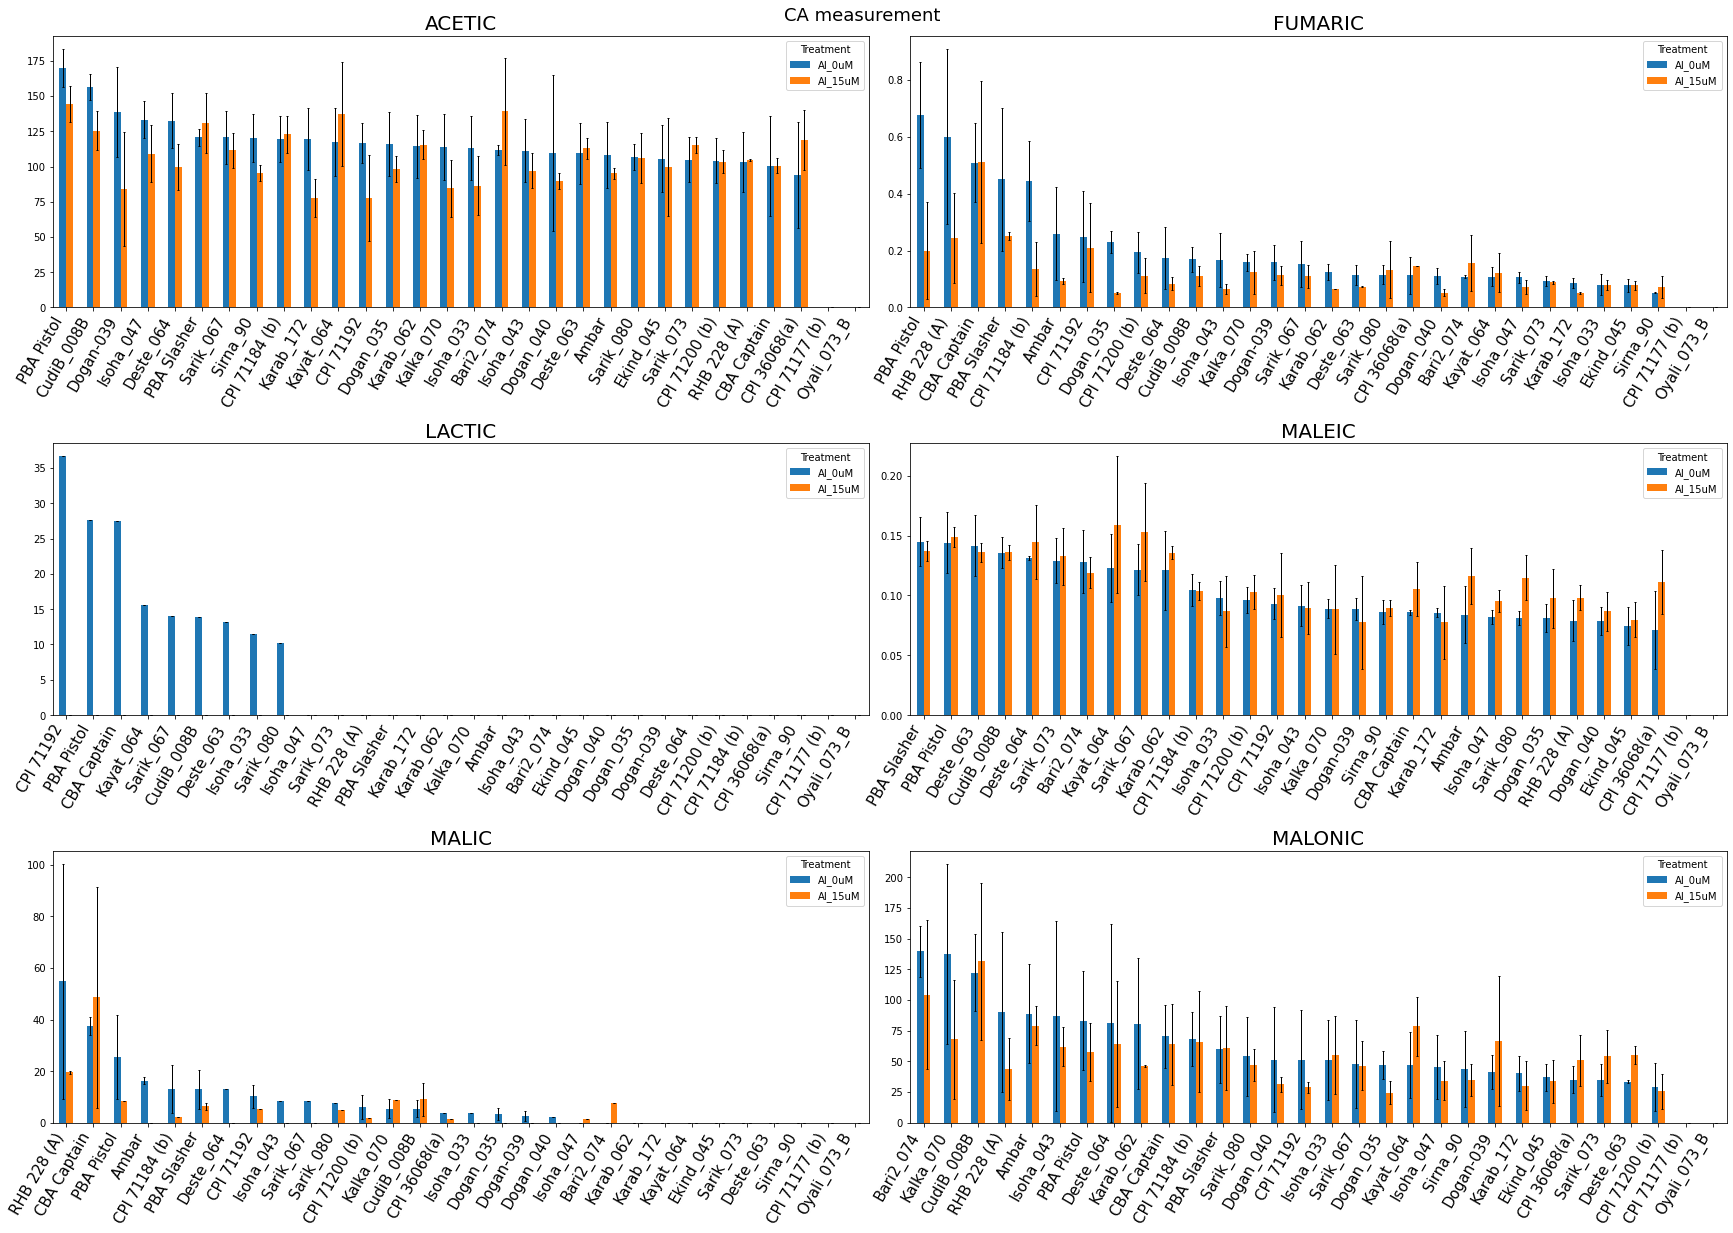

In [80]:
## create subplots using plt.subplots()
acids = ['acetic', 'fumaric','lactic', 'maleic', 'malic', 'malonic']
fig = plt.figure(figsize=(30, 20))
plt.suptitle("CA measurement", fontsize=18,y=0.9)
for n, acid in enumerate(acids):
    # add a new subplot iteratively
    data=data21[data21.Acid==acid] # get acid data
    data_ax = data.pivot("Name", "Treatment", "mean").sort_values(by=["Al_0uM"],ascending=False) # sort data by Al_0uM control
    sorter = data_ax.index.to_list()
    errors = data.pivot("Name", "Treatment", "std")
    errors = errors.reindex(sorter)

    ax = plt.subplot(3, 2, n + 1)
    data_ax.plot.bar(yerr=errors,ax=ax,error_kw=dict(lw=1, capsize=1, capthick=1))

    # chart formatting
    ax.set_title(acid.upper(),fontsize=20)
    ax.set(xlabel=None)
    ax.set_xticklabels(ax.get_xticklabels(), 
                         rotation=60,
                        fontsize=15,
                         horizontalalignment='right')
    ##another way to add error bar
#     x_array = np.asarray([[0, 0], [1, 1]]).T ## x axis position
#     y_array = np.asarray([[0.3, 0.4], [0.01 , 0.02]]).T## up and low limit of std
    
#     ax.plot(x_array,y_array)
plt.subplots_adjust(wspace=0.05, hspace=0.5)
plt.show()

## add statistics annotation

In [82]:
# A few helper functions:
import matplotlib.pyplot as plt
from utils import *
import numpy as np
from scipy.stats import mannwhitneyu, normaltest

In [92]:
def print_n_projects(df, df_name="the dataset"):
    print(f"There are {df.shape[0]} projects in {df_name}.")
    
    
def describe_array(array: np.array, name=None, min_len=15):
    name = f"\"{name}\"".ljust(min_len) if name is not None else ''
    print(f"{name}Number of projects: {len(array)}" + "\t" 
          + f"Min: {array.min():.2f}" + "\t"
          + f"Max: {array.max():.2e}" + "\t"
          + f"Avg: {array.mean():.2f}" + "\t"
          + f"Median: {np.percentile(array, 50):.2e}")
    
    
def get_projects_by(df, row_name, func):
    """Returns a list of projects, sorted by `func` result by `Subcategory`"""
    # noinspection PyUnresolvedReferences
    func = getattr(pd.core.groupby.generic.DataFrameGroupBy, func)
    grouped_df = (func(df.groupby("Subcategory"))
                  .sort_values(by=row_name, ascending=False)
                  .reset_index())
    ans = []
    for index, row in grouped_df.iterrows():
        ans.append(
            f"{index+1}. {row.Subcategory.ljust(20-(index+1)//10)} "
            f"{row[[row_name]].values[0]:.2e}")
    return ans


def print_projects_by(df, row_name, func):
    """Prints a list of projects, sorted by `func` result by `Subcategory`"""
    projects = get_projects_by(df, row_name, func)
    print("\n".join(projects))
    
    
def label_plot_for_subcats(ax):
    plt.title("Goal amounts per Technology Subcategory", y=1.06)
    ax.set_ylabel("Goal ($)")
    ax.set_xlabel("Technology Project Subcategory", labelpad=20)
    
    
def label_plot_for_states(ax):
    plt.title("Goal amounts per project State", y=1.06)
    ax.set_ylabel("Goal ($)")
    ax.set_xlabel("Project State", labelpad=20)
    
    
def get_log_ax(orient="v"):
    if orient == "v":
        figsize = (12, 6)
        set_scale = "set_yscale"
    else:
        figsize = (10, 8)
        set_scale = "set_xscale"
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    fig.patch.set_alpha(1)
    getattr(ax, set_scale)("log")
    return ax


def add_legend(ax):
    ax.legend(loc=(1.05, 0.5))

In [83]:
data21.head()

,Name,Acid,count,mean,std,min,25%,50%,75%,max,Treatment
0,Ambar,acetic,3.0,108.299153,23.349542,81.41656,100.684675,119.95279,121.740450,123.52811,Al_0uM
4,Ambar,fumaric,3.0,0.259997,0.162220,0.07766,0.195835,0.31401,0.351165,0.38832,Al_0uM
6,Ambar,lactic,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,Al_0uM
7,Ambar,maleic,3.0,0.083847,0.023973,0.06023,0.071690,0.08315,0.095655,0.10816,Al_0uM
8,Ambar,malic,2.0,16.298680,1.352257,15.34249,15.820585,16.29868,16.776775,17.25487,Al_0uM


In [112]:
## test plotting
data = df_control_treatment.loc[df_control_treatment.Acid=="malonic",:]
#data = data.loc[data.Submission==1,:]
data.head()

,Container,Submission,SampleName,Acid,Concentration,Replicate,Treatment,Exp 18 ID,AGG Accession,Name,st dry wt,rt dry wt,LLR 1,LLR 2,Concentration_wt
1,1,1,1-1,malonic,88.72245,R1,0 Al,2,49871,CudiB_008B,0.140,0.082,173.0,118.0,1081.981098
14,1,1,1-2,malonic,63.22581,R1,0 Al,4,49969,Kayat_064,0.165,0.085,133.0,115.0,743.833059
27,1,1,1-3,malonic,43.90336,R1,0 Al,6,50033,Sarik_067,0.088,0.080,128.0,110.0,548.792000
40,1,1,1-5,malonic,33.48289,R1,0 Al,10,50111,Deste_064,0.056,0.049,128.0,168.0,683.324286
53,1,1,1-14,malonic,57.44759,R1,0 Al,28,PBA Pistol,PBA Pistol,0.319,0.132,183.0,193.0,435.209015


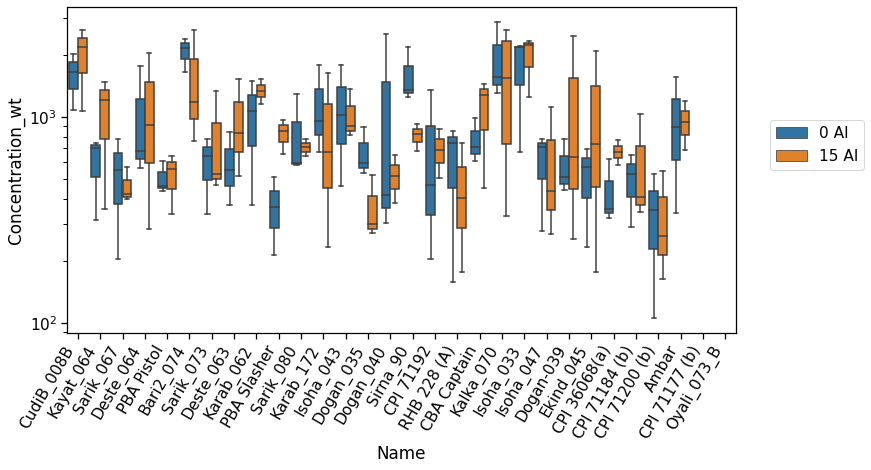

In [113]:
with sns.plotting_context('notebook', font_scale=1.4):
    # Create new plot
    ax = get_log_ax()

    # Plot with seaborn
    ax = sns.boxplot(ax=ax,
                     data=data,
                     x='Name', y='Concentration_wt',
                     hue="Treatment")

    # Label and show
    add_legend(ax)
    #label_plot_for_subcats(ax)
    ax.set_xticklabels(ax.get_xticklabels(), 
                         rotation=60,
                         horizontalalignment='right')
    plt.show()

In [116]:
LINES

array(['CudiB_008B', 'Kayat_064', 'Sarik_067', 'Deste_064', 'PBA Pistol',
       'Bari2_074', 'Sarik_073', 'Deste_063', 'Karab_062', 'PBA Slasher',
       'Sarik_080', 'Karab_172', 'Isoha_043', 'Dogan_035', 'Dogan_040',
       'Sirna_90', 'CPI 71192', 'RHB 228 (A)', 'CBA Captain', 'Kalka_070',
       'Isoha_033', 'Isoha_047', 'Dogan-039', 'Ekind_045', 'CPI 36068(a)',
       'CPI 71184 (b)', 'CPI 71200 (b)', 'Ambar', 'CPI 71177 (b)',
       'Oyali_073_B'], dtype=object)

In [117]:
## create pairs for p-value calculation and plotting
LINES = data.Name.unique()[:-2]
data = data.loc[data.Name.isin(LINES),:]
pairs = []
for line in LINES:
    pair = [(line,"0 Al"),(line,"15 Al")]
    pairs.append(pair)
pairs

[[('CudiB_008B', '0 Al'), ('CudiB_008B', '15 Al')],
 [('Kayat_064', '0 Al'), ('Kayat_064', '15 Al')],
 [('Sarik_067', '0 Al'), ('Sarik_067', '15 Al')],
 [('Deste_064', '0 Al'), ('Deste_064', '15 Al')],
 [('PBA Pistol', '0 Al'), ('PBA Pistol', '15 Al')],
 [('Bari2_074', '0 Al'), ('Bari2_074', '15 Al')],
 [('Sarik_073', '0 Al'), ('Sarik_073', '15 Al')],
 [('Deste_063', '0 Al'), ('Deste_063', '15 Al')],
 [('Karab_062', '0 Al'), ('Karab_062', '15 Al')],
 [('PBA Slasher', '0 Al'), ('PBA Slasher', '15 Al')],
 [('Sarik_080', '0 Al'), ('Sarik_080', '15 Al')],
 [('Karab_172', '0 Al'), ('Karab_172', '15 Al')],
 [('Isoha_043', '0 Al'), ('Isoha_043', '15 Al')],
 [('Dogan_035', '0 Al'), ('Dogan_035', '15 Al')],
 [('Dogan_040', '0 Al'), ('Dogan_040', '15 Al')],
 [('Sirna_90', '0 Al'), ('Sirna_90', '15 Al')],
 [('CPI 71192', '0 Al'), ('CPI 71192', '15 Al')],
 [('RHB 228 (A)', '0 Al'), ('RHB 228 (A)', '15 Al')],
 [('CBA Captain', '0 Al'), ('CBA Captain', '15 Al')],
 [('Kalka_070', '0 Al'), ('Kalka_070

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PBA Slasher_0 Al vs. PBA Slasher_15 Al: t-test independent samples, P_val:1.920e-02 t=-3.794e+00
Sarik_080_0 Al vs. Sarik_080_15 Al: t-test independent samples, P_val:7.447e-01 t=3.570e-01
Karab_172_0 Al vs. Karab_172_15 Al: t-test independent samples, P_val:6.165e-01 t=5.422e-01
Isoha_043_0 Al vs. Isoha_043_15 Al: t-test independent samples, P_val:8.923e-01 t=1.442e-01
Dogan_035_0 Al vs. Dogan_035_15 Al: t-test independent samples, P_val:8.691e-02 t=2.258e+00
Dogan_040_0 Al vs. Dogan_040_15 Al: t-test independent samples, P_val:5.884e-01 t=6.041e-01
Sirna_90_0 Al vs. Sirna_90_15 Al: t-test independent samples, P_val:6.148e-02 t=2.578e+00
CPI 71192_0 Al vs. CPI 71192_15 Al: t-test independent samples, P_val:9.728e-01 t=-3.695e-02
RHB 228 (A)_0 Al vs. RHB 228 (A)_15 Al: t-test independent samples, P_val:6.192

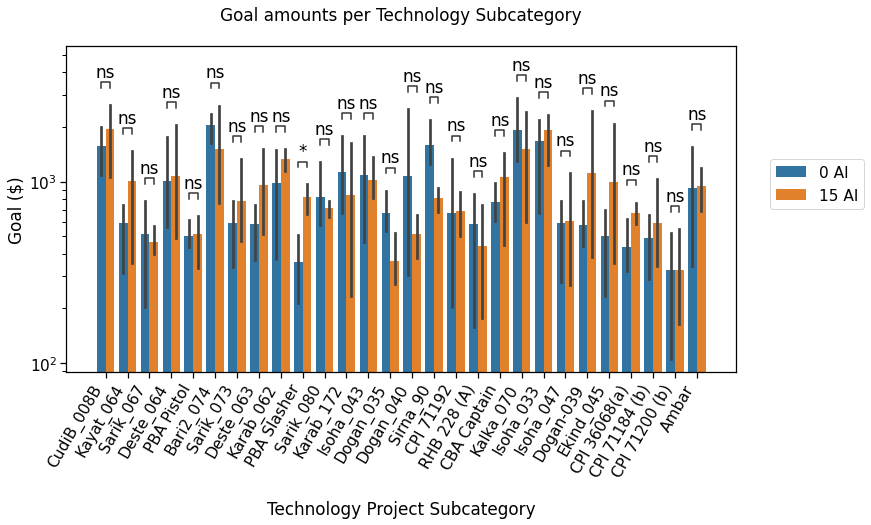

In [122]:
hue_plot_params = {
    'data': data,
    'x': 'Name',
    'y': 'Concentration_wt',
    "hue": "Treatment"
}

with sns.plotting_context("notebook", font_scale=1.4):
    # Create new plot
    ax = get_log_ax()

    # Plot with seaborn
    ax = sns.barplot(ax=ax, **hue_plot_params)

    # Add annotations
    annotator = Annotator(ax, pairs, **hue_plot_params)
    #annotator.configure(test="Mann-Whitney").apply_and_annotate()
    annotator.configure(test="t-test_ind").apply_and_annotate()
    
    # Label and show
    add_legend(ax)
    label_plot_for_subcats(ax)
    ax.set_xticklabels(ax.get_xticklabels(), 
                         rotation=60,
                         horizontalalignment='right')
    plt.show()

In [124]:
df_control_treatment.head()

,Container,Submission,SampleName,Acid,Concentration,Replicate,Treatment,Exp 18 ID,AGG Accession,Name,st dry wt,rt dry wt,LLR 1,LLR 2,Concentration_wt
0,1,1,1-1,malic,3.12260,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0,38.080488
1,1,1,1-1,malonic,88.72245,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0,1081.981098
2,1,1,1-1,iso-citric,NaN,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0,NaN
3,1,1,1-1,shikimic,NaN,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0,NaN
4,1,1,1-1,lactic,13.87087,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173.0,118.0,169.156951


In [126]:
list(np.arange(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [130]:
a = list(np.arange(1))
b = list(np.arange(2))
[(x,y) for x in a for y in b]

[(0, 0), (0, 1)]

In [131]:
## filter data
data = df_control_treatment.loc[df_control_treatment.Submission==1,:]

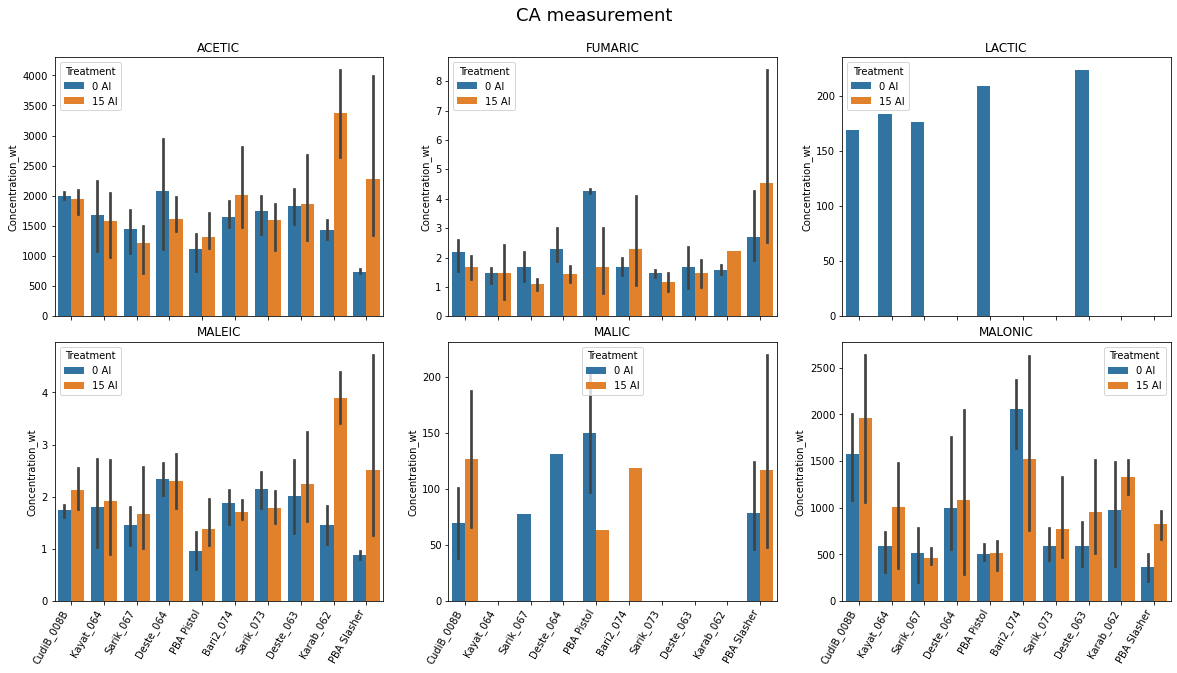

In [135]:
## looping to create subplots
acids = ['acetic', 'fumaric','lactic', 'maleic', 'malic', 'malonic']
fig,axs = plt.subplots(2,3,figsize=(20, 10),sharex=True,sharey=False)
plt.subplots_adjust(hspace=0.1)
plt.suptitle("CA measurement", fontsize=18, y=0.95)

for acid, ax in zip(acids, axs.ravel()):
    data_tem=data.loc[data.Acid==acid,:]
    sns.barplot(x="Name", y="Concentration_wt", data=data_tem,ax=ax,hue="Treatment") # working
    # ax = sns.barplot(x="Name", y="mean", data=data) # not working
    
    # chart formatting
    ax.set_title(acid.upper())
    ax.set(xlabel=None)
    ax.set_xticklabels(ax.get_xticklabels(), 
                         rotation=60, 
                         horizontalalignment='right')
plt.show()

In [142]:
## create pairs for p-value calculation and plotting
acids = ['acetic', 'fumaric','lactic', 'maleic', 'malic', 'malonic']
LINES = data.Name.unique()
Treatment = ["0 Al","15 Al"]
pairs=[]
for line in LINES:
    pair = [(x,y) for x in [line] for y in Treatment]
    pairs.append(pair)

In [143]:
pairs

[[('CudiB_008B', '0 Al'), ('CudiB_008B', '15 Al')],
 [('Kayat_064', '0 Al'), ('Kayat_064', '15 Al')],
 [('Sarik_067', '0 Al'), ('Sarik_067', '15 Al')],
 [('Deste_064', '0 Al'), ('Deste_064', '15 Al')],
 [('PBA Pistol', '0 Al'), ('PBA Pistol', '15 Al')],
 [('Bari2_074', '0 Al'), ('Bari2_074', '15 Al')],
 [('Sarik_073', '0 Al'), ('Sarik_073', '15 Al')],
 [('Deste_063', '0 Al'), ('Deste_063', '15 Al')],
 [('Karab_062', '0 Al'), ('Karab_062', '15 Al')],
 [('PBA Slasher', '0 Al'), ('PBA Slasher', '15 Al')]]

In [151]:
pairs_dict = {"acetic":pairs,
             "fumaric":pairs,
              "lactic":[],
             "maleic":pairs,
             "malic":[pairs[0]]+[pairs[4]]+[pairs[9]],
             "malonic":pairs}

In [155]:
data.loc[data.Acid=="lactic",:].head()

,Container,Submission,SampleName,Acid,Concentration,Replicate,Treatment,Exp 18 ID,AGG Accession,Name,st dry wt,rt dry wt,LLR 1,LLR 2,Concentration_wt
4,1,1,1-1,lactic,13.87087,R1,0 Al,2,49871,CudiB_008B,0.140,0.082,173.0,118.0,169.156951
17,1,1,1-2,lactic,15.58296,R1,0 Al,4,49969,Kayat_064,0.165,0.085,133.0,115.0,183.328941
30,1,1,1-3,lactic,14.05984,R1,0 Al,6,50033,Sarik_067,0.088,0.080,128.0,110.0,175.748000
43,1,1,1-5,lactic,NaN,R1,0 Al,10,50111,Deste_064,0.056,0.049,128.0,168.0,NaN
56,1,1,1-14,lactic,27.58779,R1,0 Al,28,PBA Pistol,PBA Pistol,0.319,0.132,183.0,193.0,208.998409


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PBA Slasher_0 Al vs. PBA Slasher_15 Al: t-test independent samples, P_val:1.485e-01 t=-1.787e+00
Karab_062_0 Al vs. Karab_062_15 Al: t-test independent samples, P_val:4.002e-02 t=-3.481e+00
Kayat_064_0 Al vs. Kayat_064_15 Al: t-test independent samples, P_val:8.466e-01 t=2.063e-01
CudiB_008B_0 Al vs. CudiB_008B_15 Al: t-test independent samples, P_val:6.744e-01 t=4.524e-01
Sarik_067_0 Al vs. Sarik_067_15 Al: t-test independent samples, P_val:5.157e-01 t=7.122e-01
Deste_064_0 Al vs. Deste_064_15 Al: t-test independent samples, P_val:4.501e-01 t=8.362e-01
PBA Pistol_0 Al vs. PBA Pistol_15 Al: t-test independent samples, P_val:5.012e-01 t=-7.384e-01
Bari2_074_0 Al vs. Bari2_074_15 Al: t-test independent samples, P_val:4.253e-01 t=-8.868e-01
Sarik_073_0 Al vs. Sarik_073_15 Al: t-test independent samples, P_val:6

/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PBA Slasher_0 Al vs. PBA Slasher_15 Al: t-test independent samples, P_val:4.260e-01 t=-8.853e-01
Karab_062_0 Al vs. Karab_062_15 Al: t-test independent samples, P_val:nan t=nan
Kayat_064_0 Al vs. Kayat_064_15 Al: t-test independent samples, P_val:9.883e-01 t=-1.558e-02
CudiB_008B_0 Al vs. CudiB_008B_15 Al: t-test independent samples, P_val:2.793e-01 t=1.251e+00
Sarik_067_0 Al vs. Sarik_067_15 Al: t-test independent samples, P_val:1.354e-01 t=1.866e+00
Deste_064_0 Al vs. Deste_064_15 Al: t-test independent samples, P_val:1.846e-01 t=1.716e+00
PBA Pistol_0 Al vs. PBA Pistol_15 Al: t-test independent samples, P_val:1.921e-02 t=3.793e+00
Bari2_074_0 Al vs. Bari2_074_15 Al: t-test independent samples, P_val:6.504e-01 t=-5.017e-01
Sarik_073_0 Al vs. Sarik_073_15 Al: t-test independent samples, P_val:4.744e-01 t=8.

/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PBA Slasher_0 Al vs. PBA Slasher_15 Al: t-test independent samples, P_val:5.326e-01 t=-6.822e-01
CudiB_008B_0 Al vs. CudiB_008B_15 Al: t-test independent samples, P_val:4.922e-01 t=-8.337e-01
PBA Pistol_0 Al vs. PBA Pistol_15 Al: t-test independent samples, P_val:nan t=nan
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PBA Slasher_0 Al vs. PBA Slasher_15 Al: t-test independent samples, P_val:1.920e-02 t=-3.794e+00
Karab_062_0 Al vs. Karab_062_15 Al: t-test independent samples, P_val:4.804e-01 t=-8.036e-01
Kayat_064_0 Al vs. Kayat_064_15 Al: t-test independent samples, P_val:3.104e-01 t=-1.160e+00
CudiB_008B_0 Al vs. CudiB_008B_15 Al: t-test independent samples, P_val:5.215e-01

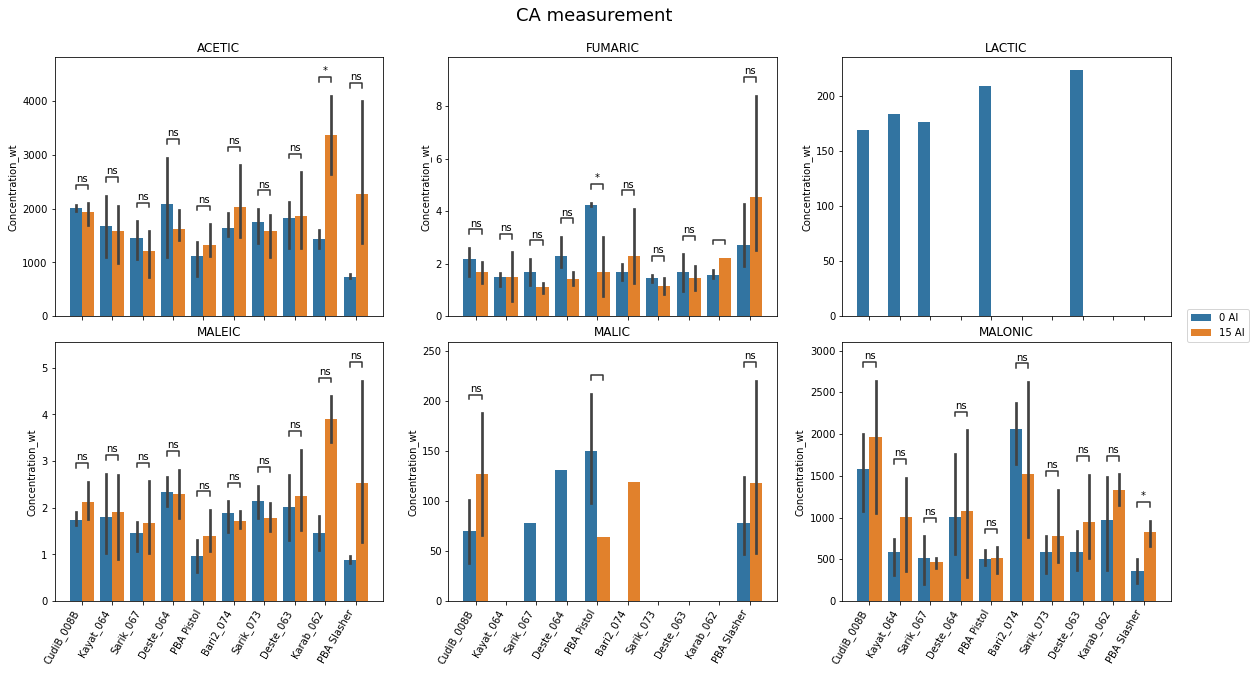

In [168]:
## looping to create subplots
acids = ['acetic', 'fumaric','lactic', 'maleic', 'malic', 'malonic']
fig,axs = plt.subplots(2,3,figsize=(20, 10),sharex=True,sharey=False)
plt.subplots_adjust(hspace=0.1)
plt.suptitle("CA measurement", fontsize=18, y=0.95)


for acid, ax in zip(acids, axs.ravel()):
    data_tem=data.loc[data.Acid==acid,:]
    hue_plot_params = {
        "data":data_tem,
        'x': 'Name',
        'y': 'Concentration_wt',
        "hue": "Treatment"
    }
    sns.barplot(ax=ax,**hue_plot_params) # working
    # ax = sns.barplot(x="Name", y="mean", data=data) # not working
    
    if acid != "lactic":
        annotator = Annotator(ax, pairs_dict[acid], **hue_plot_params)
        annotator.configure(test="t-test_ind").apply_and_annotate()
    # chart formatting
    ax.set_title(acid.upper())
    #ax.legend(loc=(0, 1))
    ax.set(xlabel=None)
    ax.set_xticklabels(ax.get_xticklabels(), 
                         rotation=60, 
                         horizontalalignment='right')
    ax.get_legend().remove()
ax.legend(loc=(1.05, 1))
plt.show()

In [169]:
fig.savefig("10_lines_norm_add_p.png",dpi=300)

In [180]:
##plotting for 30 lines with p-values
##statistics test option include:
#t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal.
df_control_treatment.Name.unique()[:-2]

array(['CudiB_008B', 'Kayat_064', 'Sarik_067', 'Deste_064', 'PBA Pistol',
       'Bari2_074', 'Sarik_073', 'Deste_063', 'Karab_062', 'PBA Slasher',
       'Sarik_080', 'Karab_172', 'Isoha_043', 'Dogan_035', 'Dogan_040',
       'Sirna_90', 'CPI 71192', 'RHB 228 (A)', 'CBA Captain', 'Kalka_070',
       'Isoha_033', 'Isoha_047', 'Dogan-039', 'Ekind_045', 'CPI 36068(a)',
       'CPI 71184 (b)', 'CPI 71200 (b)', 'Ambar', 'CPI 71177 (b)'],
      dtype=object)

In [181]:
## create pairs for p-value calculation and plotting
acids = ['acetic', 'fumaric','lactic', 'maleic', 'malic', 'malonic']
LINES = df_control_treatment.Name.unique()[:-2]
Treatment = ["0 Al","15 Al"]
pairs2=[]
for line in LINES:
    pair = [(x,y) for x in [line] for y in Treatment]
    pairs2.append(pair)

In [184]:
pairs2_dict = {"acetic":pairs2,
             "fumaric":pairs2,
              "lactic":[],
             "maleic":pairs2,
             "malic":[pairs2[0]]+[pairs2[4]]+[pairs2[9]]+[pairs2[10]]+[pairs2[16]]+[pairs2[17]]+[pairs2[18]],
             "malonic":pairs2}

In [257]:
data_tem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 1 to 1418
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Container         169 non-null    int64  
 1   Submission        169 non-null    int64  
 2   SampleName        169 non-null    object 
 3   Acid              169 non-null    object 
 4   Concentration     163 non-null    float64
 5   Replicate         169 non-null    object 
 6   Treatment         169 non-null    object 
 7   Exp 18 ID         169 non-null    int64  
 8   AGG Accession     169 non-null    object 
 9   Name              169 non-null    object 
 10  st dry wt         164 non-null    float64
 11  rt dry wt         164 non-null    float64
 12  LLR 1             164 non-null    float64
 13  LLR 2             157 non-null    float64
 14  Concentration_wt  163 non-null    float64
dtypes: float64(6), int64(3), object(6)
memory usage: 25.2+ KB


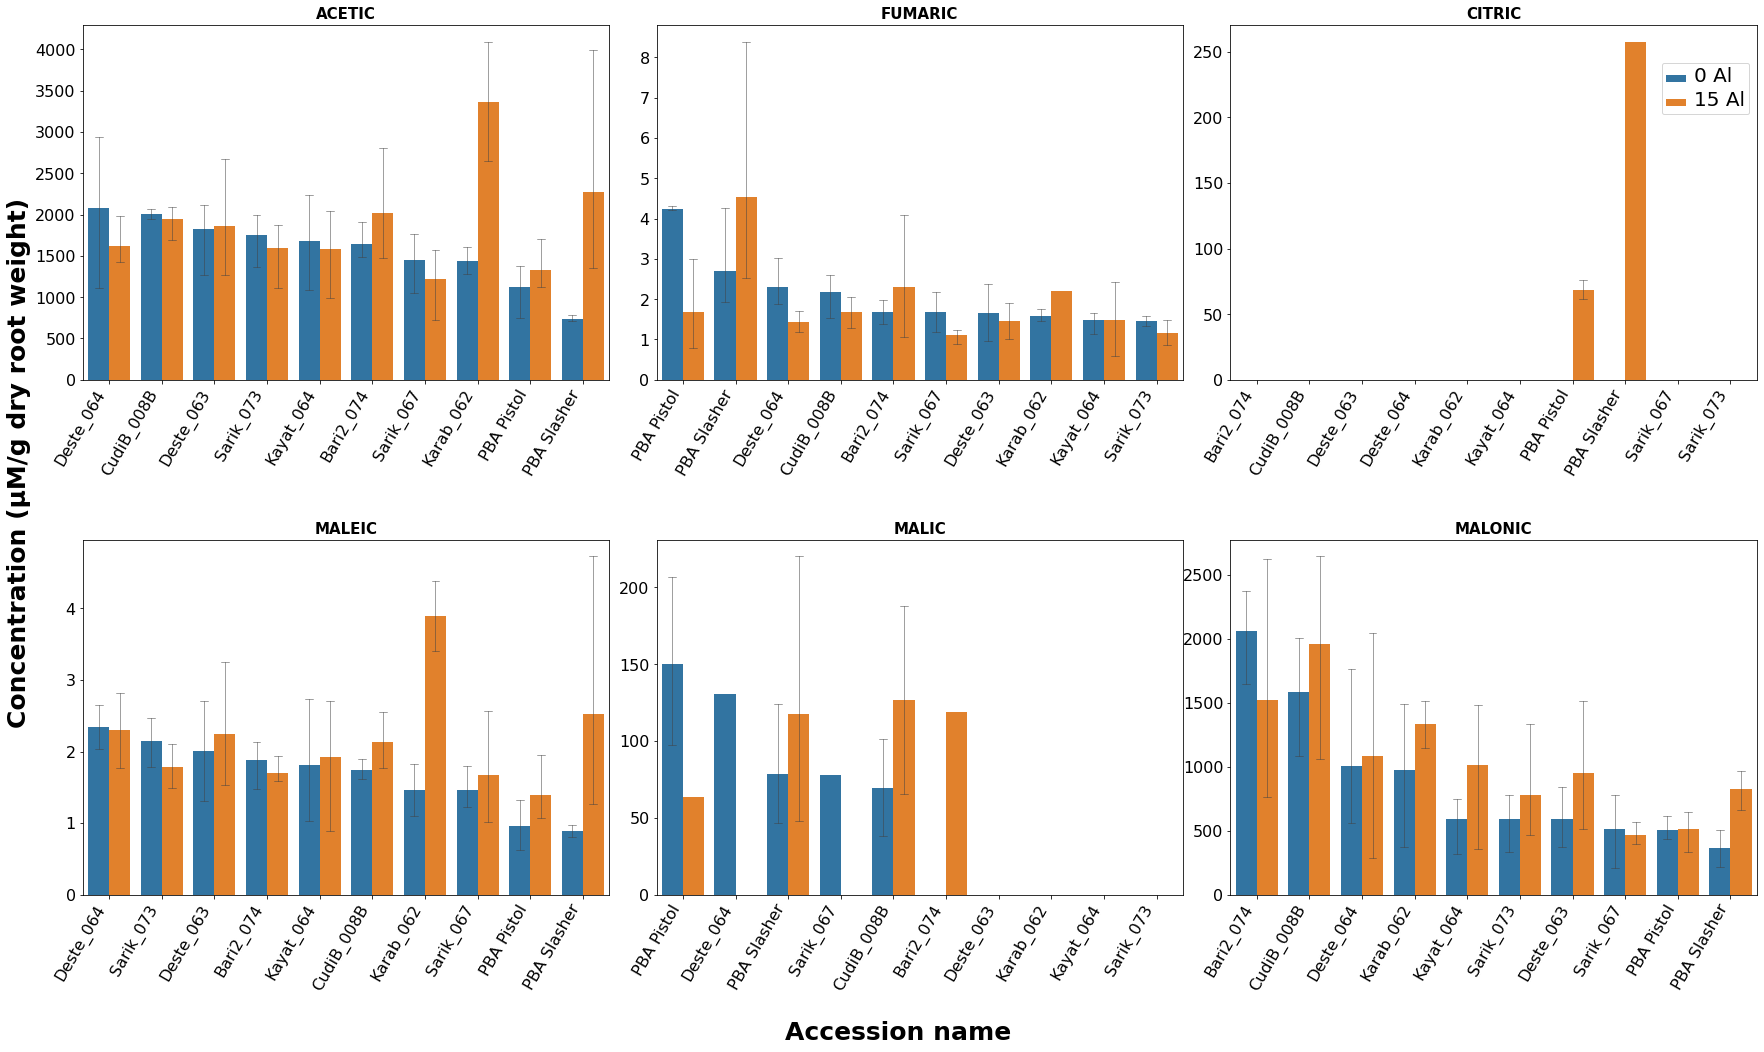

In [286]:
## looping to create subplots
acids = ['acetic', 'fumaric','citric', 'maleic', 'malic', 'malonic']
fig,axs = plt.subplots(2,3,figsize=(30, 16),sharex=False,sharey=False)
plt.subplots_adjust(hspace=0.45,wspace=0.09)
#plt.suptitle("CA measurement", fontsize=22, y=0.95, fontweight="bold")
sns.reset_orig()
#sns.set(font_scale=1.2)
#sns.set_style(style='white')

for acid, ax in zip(acids, axs.ravel()):
    #filter data for acid
    data_tem=df_control_treatment.loc[df_control_treatment.Acid==acid,:]
    data_tem = data_tem.loc[data_tem.Submission==1,:]
    
    #calculate mean and get order
    data_ax = data_tem.loc[data_tem.Treatment=="0 Al",:].groupby("Name").Concentration_wt.describe()
    sorter = data_ax.sort_values(by="mean", ascending=False).index.to_list()
    
        #plotting parameters
    hue_plot_params = {
        "data":data_tem,
        'x': 'Name',
        'y': 'Concentration_wt',
        "hue": "Treatment",
        "order":sorter,
        "capsize":.15,
        "errwidth":0.5
    }
    
    #plotting
    sns.barplot(ax=ax,**hue_plot_params) # working
    # ax = sns.barplot(x="Name", y="mean", data=data) # not working
    
#     if acid != "lactic":
#          annotator = Annotator(ax, pairs2_dict[acid], **hue_plot_params)
#          annotator.configure(test="t-test_ind",verbose=False).apply_and_annotate()
    # chart formatting
    ax.set_title(acid.upper(),fontsize=15,fontweight="bold") # add subplot title
    ax.tick_params(axis='both', labelsize=16)

    ax.set(xlabel=None) # hide x axis label
    ax.set_xticklabels(ax.get_xticklabels(), 
                         rotation=60,
                       fontsize=16,
                         horizontalalignment='right') # rotate and increase fontsize
    
    ax.set_ylabel('', fontsize=15) # hide y axis label
    #ax.set_yticklabels(ax.get_yticklabels(),fontsize=12)
   
    
    ax.get_legend().remove() # hide subplot legend
    
ax.legend(loc=(0.82, 2.2)) # add last legend as common legend

plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
#plt.ylabel('Concentration (μM/g dry root weight)', fontsize=15,fontweight='bold')
fig.text(0.09, 0.5, 'Concentration (μM/g dry root weight)', va='center', rotation='vertical',fontsize=25,fontweight='bold')
fig.text(0.45, 0.005, 'Accession name', va='center',fontsize=25,fontweight='bold') ##
#plt.tight_layout()
#plt.subplots_adjust(bottom=0.15)
plt.show()

In [285]:
fig.savefig("30_lines_norm_sorted_citric.png",dpi=300,bbox_inches="tight")

## First 10 Lines raw

In [ ]:
cols = ["Container","set","SampleName","Acid","Concentration","Replicate","Treatment",'Exp 18 ID',
 'AGG Accession',
 'Name',
 'st dry wt',
 'rt dry wt',
 'LLR 1',
 'LLR 2']

In [314]:
df_submission1 = df_merged1[cols]

In [316]:
df_submission1.tail()

,Container,set,SampleName,Acid,Concentration,Replicate,Treatment,Exp 18 ID,AGG Accession,Name,st dry wt,rt dry wt,LLR 1,LLR 2
762,6,1,6-20,succinic,NaN,R3,15 Al,10,50111,Deste_064,0.065,0.069,110,90.0
763,6,1,6-20,citramalic,NaN,R3,15 Al,10,50111,Deste_064,0.065,0.069,110,90.0
764,6,1,6-20,cis-aconitic,NaN,R3,15 Al,10,50111,Deste_064,0.065,0.069,110,90.0
765,6,1,6-20,fumaric,NaN,R3,15 Al,10,50111,Deste_064,0.065,0.069,110,90.0
766,6,1,6-20,trans-aconitic,NaN,R3,15 Al,10,50111,Deste_064,0.065,0.069,110,90.0


In [323]:
## groupby to get mean and std

df_submission1["Concentration"] = pd.to_numeric(df_submission1["Concentration"],errors='coerce') ## change object to float

df_submission1_control = df_submission1[df_submission1["Treatment"]=="0 Al"]
df_submission1_treatment = df_submission1[df_submission1["Treatment"]=="15 Al"]

df_submission1_control_raw = df_submission1_control.groupby(["Name","Acid"])["Concentration"].describe()
df_submission1_treatment_raw = df_submission1_treatment.groupby(["Name","Acid"])["Concentration"].describe()

acids = ['acetic','fumaric','lactic', 'maleic', 'malic', 'malonic']
data1 = df_submission1_control_raw.reset_index().fillna(0) ## control
data2 = df_submission1_treatment_raw.reset_index().fillna(0) ## treatment

data1 = data1[data1.Acid.isin(acids)]
data2 = data2[data2.Acid.isin(acids)]

data1["Treatment"] = "Al_0uM"
data2["Treatment"] = "Al_15uM"

data21 = pd.concat([data1,data2])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [324]:
df_submission1_control.dtypes

Container          int64
set               object
SampleName        object
Acid              object
Concentration    float64
Replicate         object
Treatment         object
Exp 18 ID          int64
AGG Accession     object
Name              object
st dry wt        float64
rt dry wt        float64
LLR 1              int64
LLR 2            float64
dtype: object

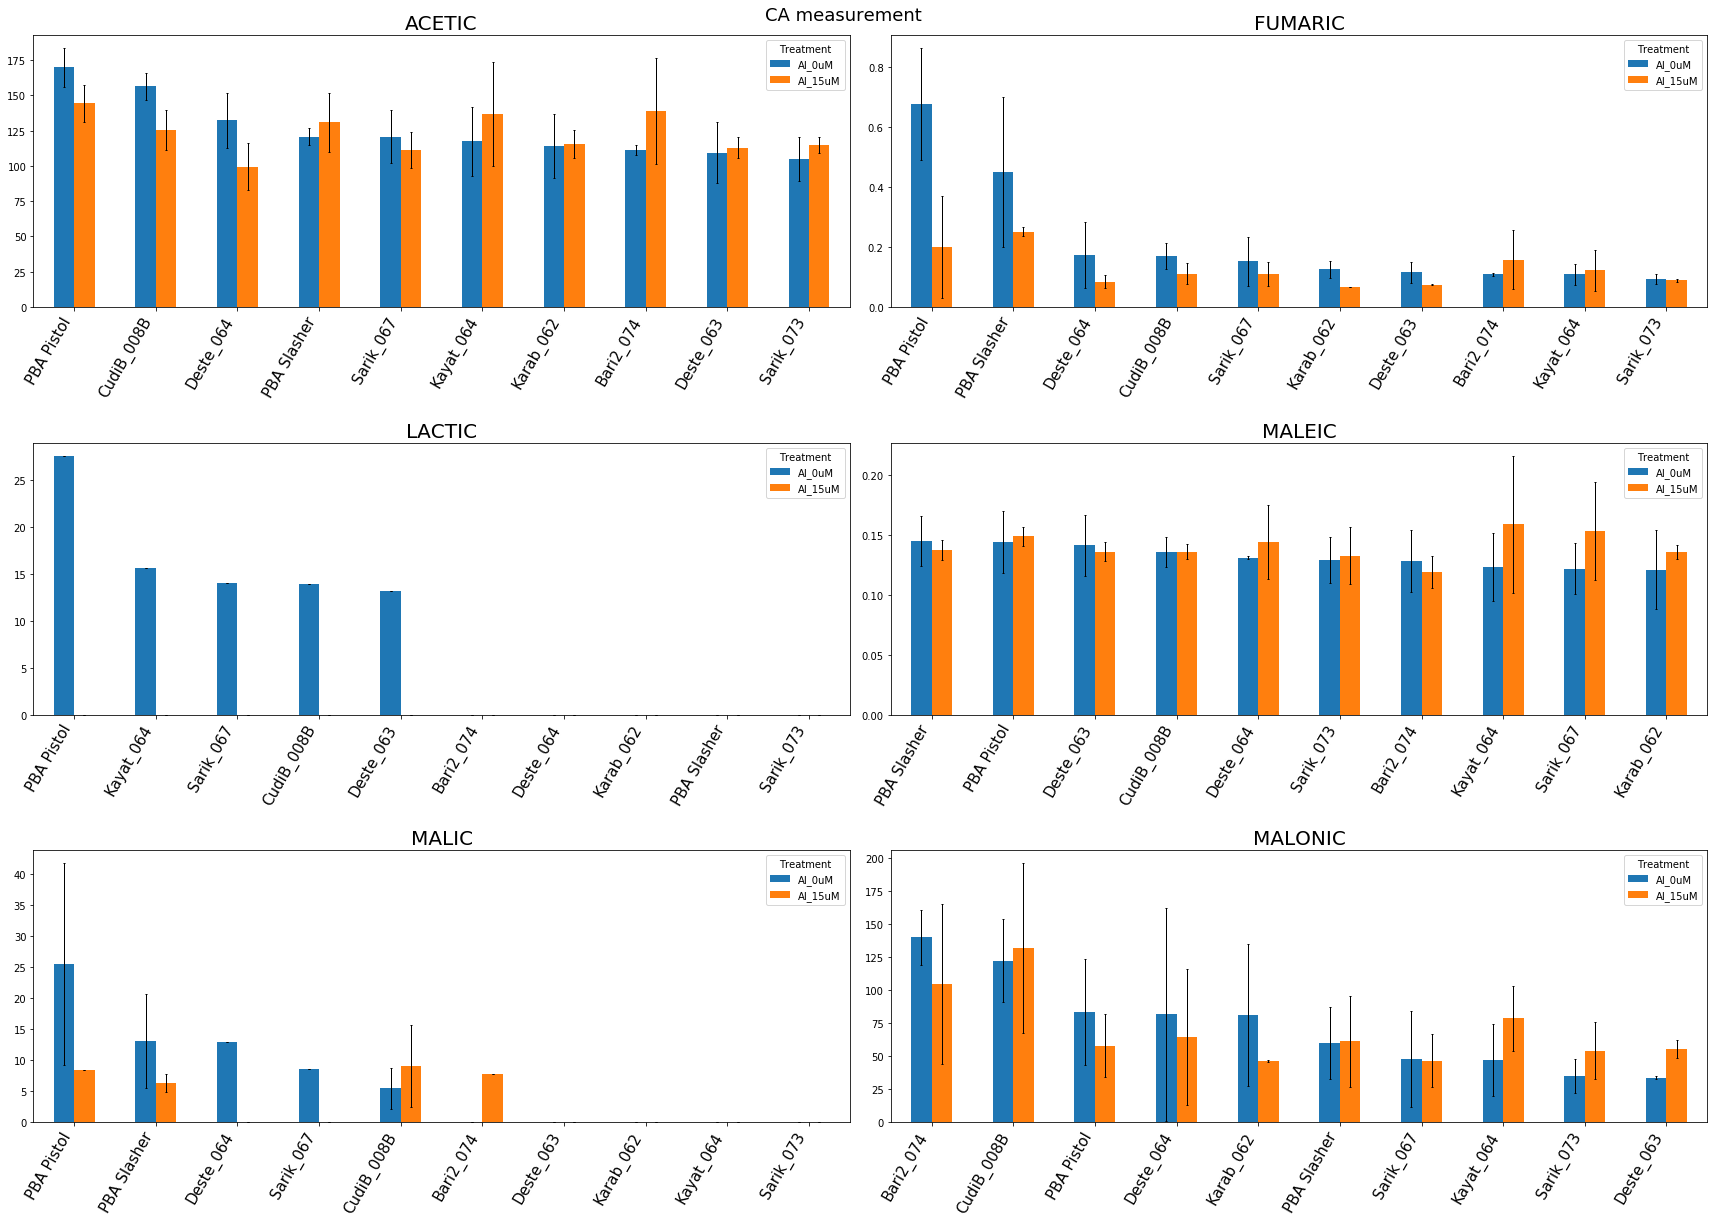

In [325]:
## create subplots using plt.subplots()
acids = ['acetic', 'fumaric','lactic', 'maleic', 'malic', 'malonic']
fig = plt.figure(figsize=(30, 20))
plt.suptitle("CA measurement", fontsize=18,y=0.9)
for n, acid in enumerate(acids):
    # add a new subplot iteratively
    data=data21[data21.Acid==acid] # get acid data
    data_ax = data.pivot("Name", "Treatment", "mean").sort_values(by=["Al_0uM"],ascending=False) # sort data by Al_0uM control
    sorter = data_ax.index.to_list()
    errors = data.pivot("Name", "Treatment", "std")
    errors = errors.reindex(sorter)

    ax = plt.subplot(3, 2, n + 1)
    data_ax.plot.bar(yerr=errors,ax=ax,error_kw=dict(lw=1, capsize=1, capthick=1))

    # chart formatting
    ax.set_title(acid.upper(),fontsize=20)
    ax.set(xlabel=None)
    ax.set_xticklabels(ax.get_xticklabels(), 
                         rotation=60,
                        fontsize=15,
                         horizontalalignment='right')
    ##another way to add error bar
#     x_array = np.asarray([[0, 0], [1, 1]]).T ## x axis position
#     y_array = np.asarray([[0.3, 0.4], [0.01 , 0.02]]).T## up and low limit of std
    
#     ax.plot(x_array,y_array)
plt.subplots_adjust(wspace=0.05, hspace=0.5)
plt.show()

## First 10 lines, normalized plotting

In [327]:
df_submission1.head()

,Container,set,SampleName,Acid,Concentration,Replicate,Treatment,Exp 18 ID,AGG Accession,Name,st dry wt,rt dry wt,LLR 1,LLR 2
0,1,1,1-1,malic,3.12260,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0
1,1,1,1-1,malonic,88.72245,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0
2,1,1,1-1,iso-citric,NaN,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0
3,1,1,1-1,shikimic,NaN,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0
4,1,1,1-1,lactic,13.87087,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0


In [328]:
df_submission1["Concentration_wt"] = df_submission1["Concentration"]/df_submission1["rt dry wt"]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [329]:
df_submission1_control = df_submission1[df_submission1["Treatment"]=="0 Al"]
df_submission1_treatment = df_submission1[df_submission1["Treatment"]=="15 Al"]

df_submission1_control_raw = df_submission1_control.groupby(["Name","Acid"])["Concentration_wt"].describe()
df_submission1_treatment_raw = df_submission1_treatment.groupby(["Name","Acid"])["Concentration_wt"].describe()

acids = ['acetic','fumaric','lactic', 'maleic', 'malic', 'malonic']
data1 = df_submission1_control_raw.reset_index().fillna(0) ## control
data2 = df_submission1_treatment_raw.reset_index().fillna(0) ## treatment

data1 = data1[data1.Acid.isin(acids)]
data2 = data2[data2.Acid.isin(acids)]

data1["Treatment"] = "Al_0uM"
data2["Treatment"] = "Al_15uM"

data21 = pd.concat([data1,data2])

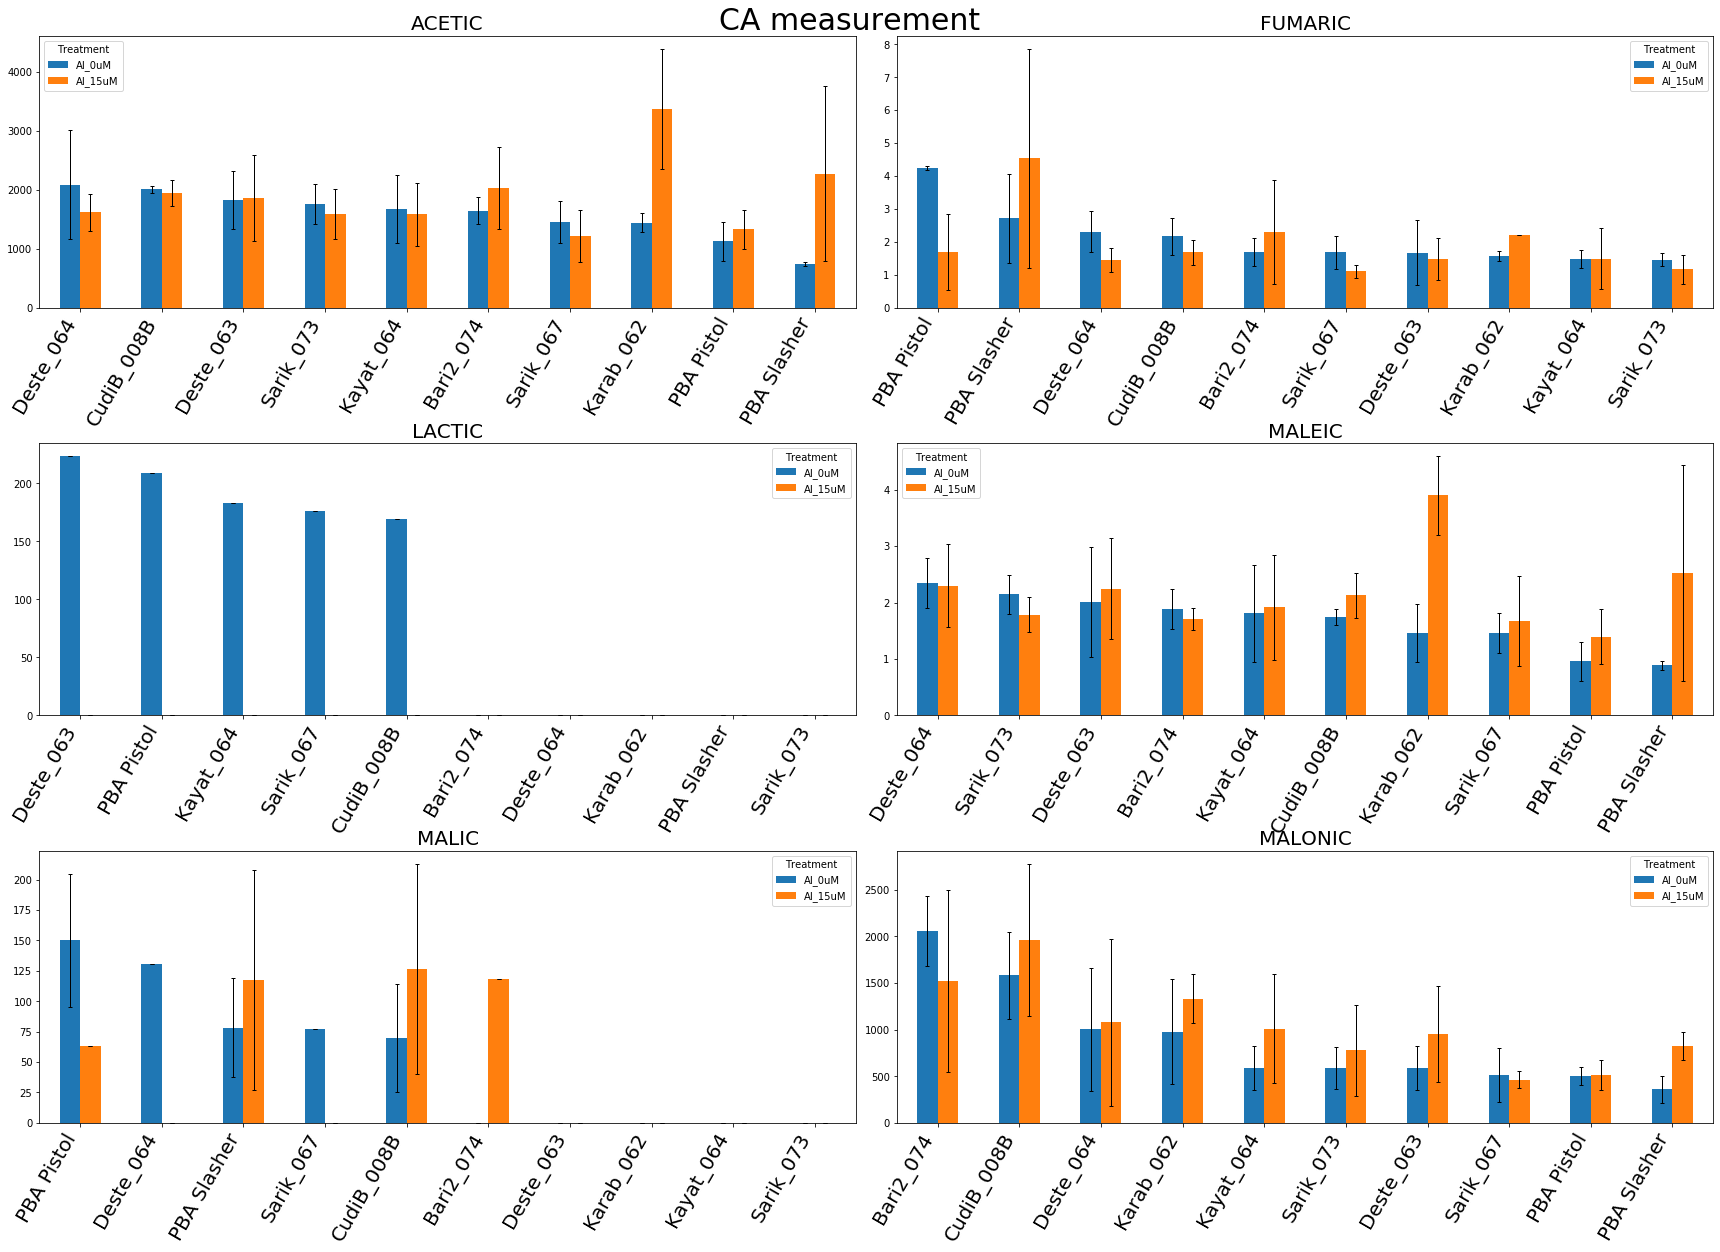

In [335]:
## create subplots using plt.subplots()
acids = ['acetic', 'fumaric','lactic', 'maleic', 'malic', 'malonic']
fig = plt.figure(figsize=(30, 20))
plt.suptitle("CA measurement", fontsize=30,y=0.9)
for n, acid in enumerate(acids):
    # add a new subplot iteratively
    data=data21[data21.Acid==acid] # get acid data
    data_ax = data.pivot("Name", "Treatment", "mean").sort_values(by=["Al_0uM"],ascending=False) # sort data by Al_0uM control
    sorter = data_ax.index.to_list()
    errors = data.pivot("Name", "Treatment", "std")
    errors = errors.reindex(sorter)

    ax = plt.subplot(3, 2, n + 1)
    data_ax.plot.bar(yerr=errors,ax=ax,error_kw=dict(lw=1, capsize=2, capthick=1))

    # chart formatting
    ax.set_title(acid.upper(),fontsize=20)
    ax.set(xlabel=None)
    ax.set_xticklabels(ax.get_xticklabels(), 
                         rotation=60,
                        fontsize=20,
                         horizontalalignment='right')
    #ax.set_yticklabels(ax.get_yticklabels(), 
    #                    fontsize=15)
    ##another way to add error bar
#     x_array = np.asarray([[0, 0], [1, 1]]).T ## x axis position
#     y_array = np.asarray([[0.3, 0.4], [0.01 , 0.02]]).T## up and low limit of std
    
#     ax.plot(x_array,y_array)
plt.subplots_adjust(wspace=0.05, hspace=0.5)
plt.show()

In [336]:
df_submission1.head()

,Container,set,SampleName,Acid,Concentration,Replicate,Treatment,Exp 18 ID,AGG Accession,Name,st dry wt,rt dry wt,LLR 1,LLR 2,Concentration_wt
0,1,1,1-1,malic,3.12260,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0,38.080488
1,1,1,1-1,malonic,88.72245,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0,1081.981098
2,1,1,1-1,iso-citric,NaN,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0,NaN
3,1,1,1-1,shikimic,NaN,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0,NaN
4,1,1,1-1,lactic,13.87087,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0,169.156951


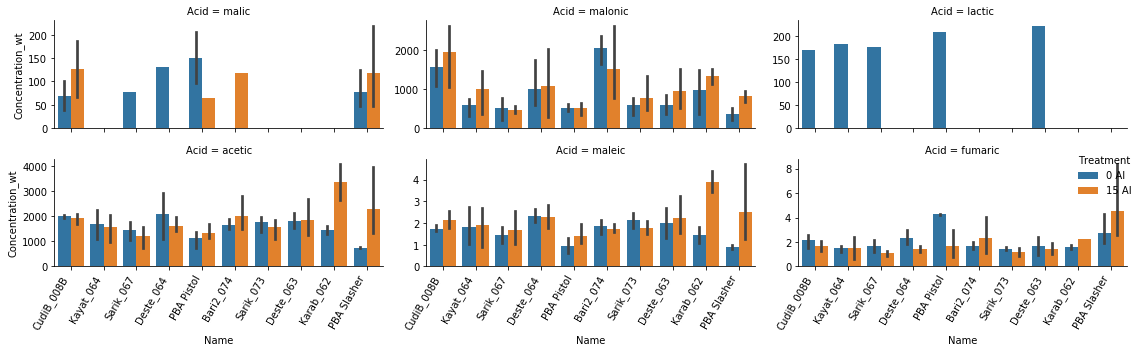

In [338]:
acids = ['acetic', 'fumaric','lactic', 'maleic', 'malic', 'malonic']
df_submission1_tem = df_submission1[df_submission1.Acid.isin(acids)] ## filter for the target 6 acids only
#sns.catplot(x="Name", y="Concentration_wt", hue="class", kind="bar", data=df_submission1_tem)

## retrieve sort line name order
df_submission1_tem2 = df_submission1_tem[]
data_ax = data.pivot("Name", "Treatment", "mean").sort_values(by=["Al_0uM"],ascending=False) # sort data by Al_0uM control
sorter = data_ax.index.to_list()

g = sns.catplot(x="Name", y="Concentration_wt", col="Acid", hue="Treatment",col_wrap=3,
                data=df_submission1_tem, sharey=False,
                kind="bar", height=2.5, aspect=2)

for axes in g.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), 
                         rotation=60, 
                         horizontalalignment='right')
plt.tight_layout()
plt.show()

### 2. normalized concentration plotting

In [79]:
## groupby to get mean and std
df_con0_nom = df_control.groupby(["Name","Acid"])["Concentration_wt"].describe()
df_con15_nom = df_treatment.groupby(["Name","Acid"])["Concentration_wt"].describe()

In [80]:
df_con0_nom.head()

count         mean         std        min        25%  \
Name  Acid                                                                 
Ambar acetic          3.0  1101.040230  534.633347  651.33248  805.47740   
      cis-aconitic    0.0          NaN         NaN        NaN        NaN   
      citramalic      0.0          NaN         NaN        NaN        NaN   
      citric          0.0          NaN         NaN        NaN        NaN   
      fumaric         3.0     2.676449    1.877435    0.62128    1.86392   

                          50%          75%          max  
Name  Acid                                               
Ambar acetic        959.62232  1325.894105  1692.165890  
      cis-aconitic        NaN          NaN          NaN  
      citramalic          NaN          NaN          NaN  
      citric              NaN          NaN          NaN  
      fumaric         3.10656     3.704033     4.301507

In [81]:
df_con0["mean"].unstack(0)

Name,Ambar,Bari2_074,CBA Captain,CPI 36068(a),CPI 71184 (b),CPI 71192,CPI 71200 (b),CudiB_008B,Deste_063,Deste_064,...,Karab_062,Karab_172,Kayat_064,PBA Pistol,PBA Slasher,RHB 228 (A),Sarik_067,Sarik_073,Sarik_080,Sirna_90
Acid,,,,,,,,,,,,,,,,,,,,,
acetic,108.299153,111.498140,100.217073,93.851087,119.619127,116.553797,104.217810,156.351560,109.335210,132.432860,...,114.242040,119.548180,117.355527,169.892487,120.734103,103.316123,120.675300,104.838550,106.961283,120.335670
cis-aconitic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citramalic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fumaric,0.259997,0.108720,0.509007,0.112930,0.444410,0.248573,0.193370,0.169463,0.115260,0.173757,...,0.125597,0.086647,0.108230,0.677450,0.451170,0.601473,0.151553,0.092835,0.115077,0.052543
iso-citric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lactic,NaN,NaN,27.420920,NaN,NaN,36.634740,NaN,13.870870,13.176060,NaN,...,NaN,NaN,15.582960,27.587790,NaN,NaN,14.059840,NaN,10.222770,NaN
maleic,0.083847,0.128277,0.085760,0.071063,0.104463,0.093070,0.096427,0.135680,0.141400,0.131105,...,0.120945,0.085673,0.123047,0.144160,0.144993,0.079005,0.121630,0.128953,0.081220,0.086320
malic,16.298680,NaN,37.465753,3.831920,13.165510,10.341840,6.118385,5.448445,NaN,12.951830,...,NaN,NaN,NaN,25.422990,13.039833,54.806873,8.530190,NaN,7.515360,NaN


### testing scatter plot without groupby

In [82]:
df_con0["mean"].max()

169.89248666666666

In [83]:
df_con15["mean"].max()

144.45466333333331

In [84]:
df_con15["mean"].max()/df_con0["mean"].max()*240

204.0650524353186

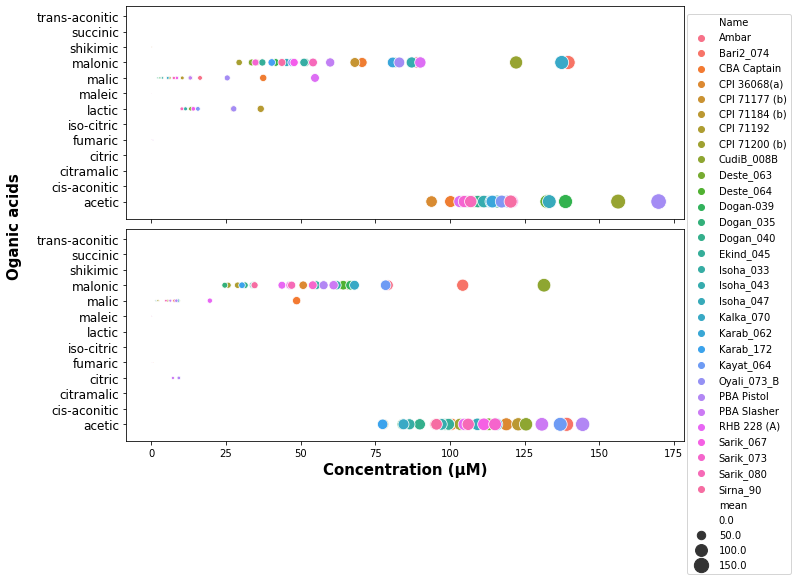

In [85]:
## reset_index to convert index back to columns

## fillna(0) to show all acids, default removing Nan lines

##swap x,y to change orientation

fig,ax=plt.subplots(2,1,figsize=(10,8),sharex=True, sharey=True)

sns.scatterplot(ax=ax[0], data=df_con0.reset_index().fillna(0),y="Acid", x="mean", hue="Name", size="mean",sizes=(0,240),\
               legend=False)

sns.scatterplot(ax=ax[1], data=df_con15.reset_index().fillna(0),y="Acid", x="mean", hue="Name", size="mean",sizes=(0,204))
## sizes adjusted based max value in two dataset

ax[1].legend(bbox_to_anchor= (1.2, 2.04) ) ## move legend position

##hide x y labels
ax[0].set_ylabel('', fontsize=15)
ax[1].set_ylabel('', fontsize=15)
plt.xlabel('Concentration (μM)', fontsize=15,fontweight='bold')

## add shared labels
#fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(-0.04, 0.5, 'Oganic acids', va='center', rotation='vertical',fontsize=15,fontweight='bold') ##

plt.setp(ax[0].get_yticklabels(), fontsize=12)
plt.setp(ax[1].get_yticklabels(), fontsize=12)

#plt.grid(True)
#plt.tight_layout() ## prevent label cutoff
plt.subplots_adjust(wspace=0, hspace=0.05) ## tight space between subplots

plt.show()


In [86]:
fig.savefig("CA_all_raw.png",dpi=600,bbox_inches = 'tight')

In [87]:
df_con0_nom.reset_index().Acid.unique()

array(['acetic', 'cis-aconitic', 'citramalic', 'citric', 'fumaric',
       'iso-citric', 'lactic', 'maleic', 'malic', 'malonic', 'shikimic',
       'succinic', 'trans-aconitic'], dtype=object)

In [88]:
order = ['cis-aconitic', 'acetic','citramalic', 'citric', 'fumaric',
       'iso-citric', 'lactic', 'maleic', 'malic', 'malonic', 'shikimic',
       'succinic', 'trans-aconitic']

In [89]:
df_con0_nom["mean"].max()

5540.093488603988

In [90]:
df_con15_nom["mean"].max()

4124.160498960499

In [91]:
df_con15_nom["mean"].max()/df_con0_nom["mean"].max()*240

178.66097779514777

In [99]:
df_con0_nom.head()

count         mean         std        min        25%  \
Name  Acid                                                                 
Ambar acetic          3.0  1101.040230  534.633347  651.33248  805.47740   
      cis-aconitic    0.0          NaN         NaN        NaN        NaN   
      citramalic      0.0          NaN         NaN        NaN        NaN   
      citric          0.0          NaN         NaN        NaN        NaN   
      fumaric         3.0     2.676449    1.877435    0.62128    1.86392   

                          50%          75%          max  
Name  Acid                                               
Ambar acetic        959.62232  1325.894105  1692.165890  
      cis-aconitic        NaN          NaN          NaN  
      citramalic          NaN          NaN          NaN  
      citric              NaN          NaN          NaN  
      fumaric         3.10656     3.704033     4.301507

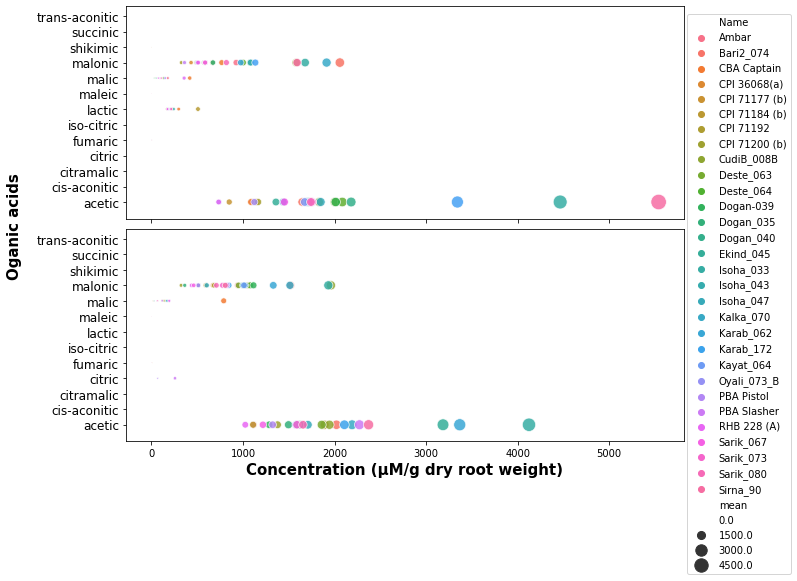

In [92]:
## reset_index to convert index back to columns
## fillna(0) to show all acids, default removing Nan lines
## swap x,y to change orientation
## testing scatterplot and swarmplot (not supporting sizes)

fig,ax=plt.subplots(2,1,figsize=(10,8),sharex=True, sharey=True)

sns.scatterplot(ax=ax[0], data=df_con0_nom.reset_index().fillna(0),y="Acid", x="mean", alpha=0.85,hue="Name", size="mean",sizes=(0,240),\
               legend=False) 
sns.scatterplot(ax=ax[1], data=df_con15_nom.reset_index().fillna(0),y="Acid", x="mean", alpha=0.85,hue="Name", size="mean",sizes=(0,179))

## sizes adjusted based max value in two dataset


ax[1].legend(bbox_to_anchor= (1.2, 2.04) ) ## move legend position

##hide x y labels
ax[0].set_ylabel('', fontsize=15)
ax[1].set_ylabel('', fontsize=15)
plt.xlabel('Concentration (μM/g dry root weight)', fontsize=15,fontweight='bold')

## add shared labels
#fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(-0.04, 0.5, 'Oganic acids', va='center', rotation='vertical',fontsize=15,fontweight='bold') ##

plt.setp(ax[0].get_yticklabels(), fontsize=12)
plt.setp(ax[1].get_yticklabels(), fontsize=12)

#plt.grid(True)
#plt.tight_layout() ## prevent label cutoff
plt.subplots_adjust(wspace=0, hspace=0.05) ## tight space between subplots

plt.show()

In [93]:
fig.savefig("CA_all_normalized_stripplot.png",dpi=600,bbox_inches = 'tight')

## Remove acids below detection threshold

In [132]:
acids = ['acetic','fumaric','lactic', 'maleic', 'malic', 'malonic']
data1 = df_con0_nom.reset_index().fillna(0) ## control
data2 = df_con15_nom.reset_index().fillna(0) ## treatment

In [133]:
data1 = data1[data1.Acid.isin(acids)]
data2 = data2[data2.Acid.isin(acids)]

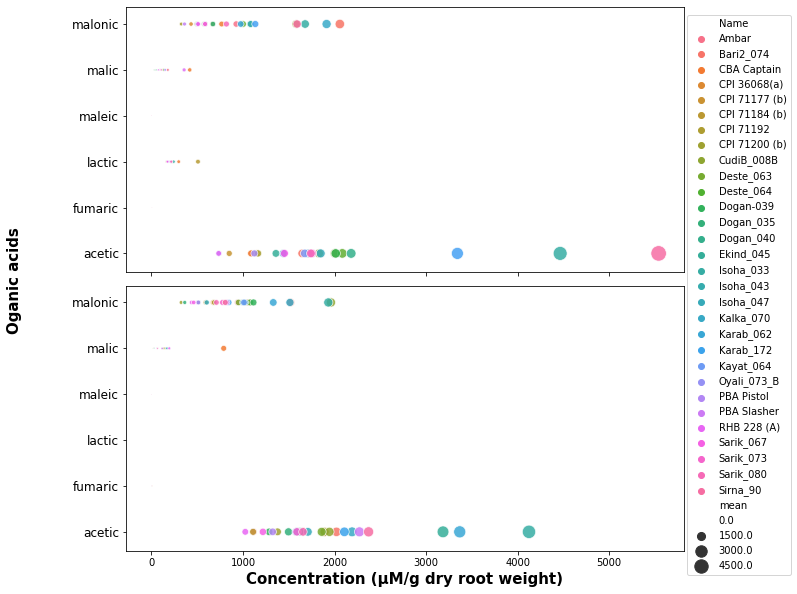

In [134]:
## fillna(0) to show all acids, default removing Nan lines
acids = ['acetic','citric', 'fumaric','lactic', 'maleic', 'malic', 'malonic']
fig,ax=plt.subplots(2,1,figsize=(10,10),sharex=True, sharey=True)

sns.scatterplot(ax=ax[0], data=data1,y="Acid", x="mean", alpha=0.85,hue="Name", size="mean",sizes=(0,240),\
               legend=False) 
sns.scatterplot(ax=ax[1], data=data2,y="Acid", x="mean", alpha=0.85,hue="Name", size="mean",sizes=(0,179))

## sizes adjusted based max value in two dataset


ax[1].legend(bbox_to_anchor= (1.2, 2.04) ) ## move legend position

##hide x y labels
ax[0].set_ylabel('', fontsize=15)
ax[1].set_ylabel('', fontsize=15)
plt.xlabel('Concentration (μM/g dry root weight)', fontsize=15,fontweight='bold')

## add shared labels
#fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(-0.04, 0.5, 'Oganic acids', va='center', rotation='vertical',fontsize=15,fontweight='bold') ##

plt.setp(ax[0].get_yticklabels(), fontsize=12)
plt.setp(ax[1].get_yticklabels(), fontsize=12)

#plt.grid(True)
#plt.tight_layout() ## prevent label cutoff
plt.subplots_adjust(wspace=0, hspace=0.05) ## tight space between subplots

plt.show()

## Bar charts

In [112]:
import matplotlib.pylab as plt

In [101]:
data1.head()

,Name,Acid,count,mean,std,min,25%,50%,75%,max
0,Ambar,acetic,3.0,1101.040230,534.633347,651.33248,805.47740,959.62232,1325.894105,1692.165890
3,Ambar,citric,0.0,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
4,Ambar,fumaric,3.0,2.676449,1.877435,0.62128,1.86392,3.10656,3.704033,4.301507
6,Ambar,lactic,0.0,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
7,Ambar,maleic,3.0,0.876228,0.532261,0.48184,0.57352,0.66520,1.073422,1.481644


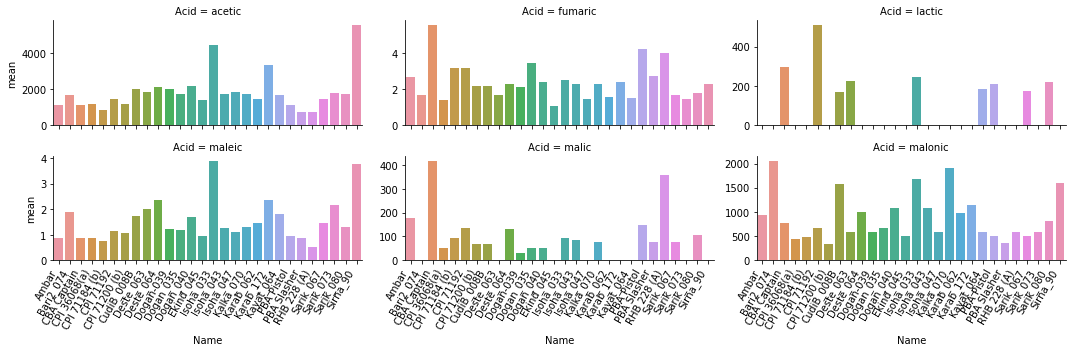

In [174]:
## create subplots using sns.catplot
#acids = ['acetic','citric', 'fumaric','lactic', 'maleic', 'malic', 'malonic']
g = sns.catplot(x="Name", y="mean", col="Acid", col_wrap=3,
                data=data1, sharey=False,
                kind="bar", height=2.5, aspect=2)
#g.set_xticklabels(rotation=60)

for axes in g.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), 
                         rotation=60, 
                         horizontalalignment='right')
plt.tight_layout()
plt.show()

In [206]:
data1.head()

,Name,Acid,count,mean,std,min,25%,50%,75%,max
0,Ambar,acetic,3.0,1101.040230,534.633347,651.33248,805.477400,959.622320,1325.894105,1692.165890
4,Ambar,fumaric,3.0,2.676449,1.877435,0.62128,1.863920,3.106560,3.704033,4.301507
6,Ambar,lactic,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
7,Ambar,maleic,3.0,0.876228,0.532261,0.48184,0.573520,0.665200,1.073422,1.481644
8,Ambar,malic,2.0,179.554001,80.347244,122.73992,151.146961,179.554001,207.961042,236.368082


In [207]:
data2.head()

,Name,Acid,count,mean,std,min,25%,50%,75%,max
0,Ambar,acetic,2.0,1115.814878,242.030357,944.673571,1030.244225,1115.814878,1201.385531,1286.956184
4,Ambar,fumaric,2.0,1.071796,0.078591,1.016224,1.044010,1.071796,1.099582,1.127368
6,Ambar,lactic,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Ambar,maleic,2.0,1.333941,0.029205,1.313289,1.323615,1.333941,1.344266,1.354592
8,Ambar,malic,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [215]:
data1["Treatment"] = "Al_0uM"
data2["Treatment"] = "Al_15uM"

In [209]:
data2.shape

(180, 10)

In [223]:
data_tem = data2[["Name","Acid"]].merge(data1,on=["Name","Acid"],how="left") ## map data1 to data2, same row number

In [228]:
data_tem.isna().sum()

Name          0
Acid          0
count        12
mean         12
std          12
min          12
25%          12
50%          12
75%          12
max          12
Treatment    12
dtype: int64

In [227]:
data_tem.fillna(np.nan,inplace=True)

In [236]:
#data21 = data2.merge(data1,on=["Name","Acid"],how="left")
data21 = pd.concat([data1,data2])

In [237]:
data21.head()

,Name,Acid,count,mean,std,min,25%,50%,75%,max,Treatment
0,Ambar,acetic,3.0,1101.040230,534.633347,651.33248,805.477400,959.622320,1325.894105,1692.165890,Al_0uM
4,Ambar,fumaric,3.0,2.676449,1.877435,0.62128,1.863920,3.106560,3.704033,4.301507,Al_0uM
6,Ambar,lactic,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Al_0uM
7,Ambar,maleic,3.0,0.876228,0.532261,0.48184,0.573520,0.665200,1.073422,1.481644,Al_0uM
8,Ambar,malic,2.0,179.554001,80.347244,122.73992,151.146961,179.554001,207.961042,236.368082,Al_0uM


In [238]:
data21.isna().sum()

Name         0
Acid         0
count        0
mean         0
std          0
min          0
25%          0
50%          0
75%          0
max          0
Treatment    0
dtype: int64

In [275]:
data21.to_csv("All_in_one_normalized.csv")

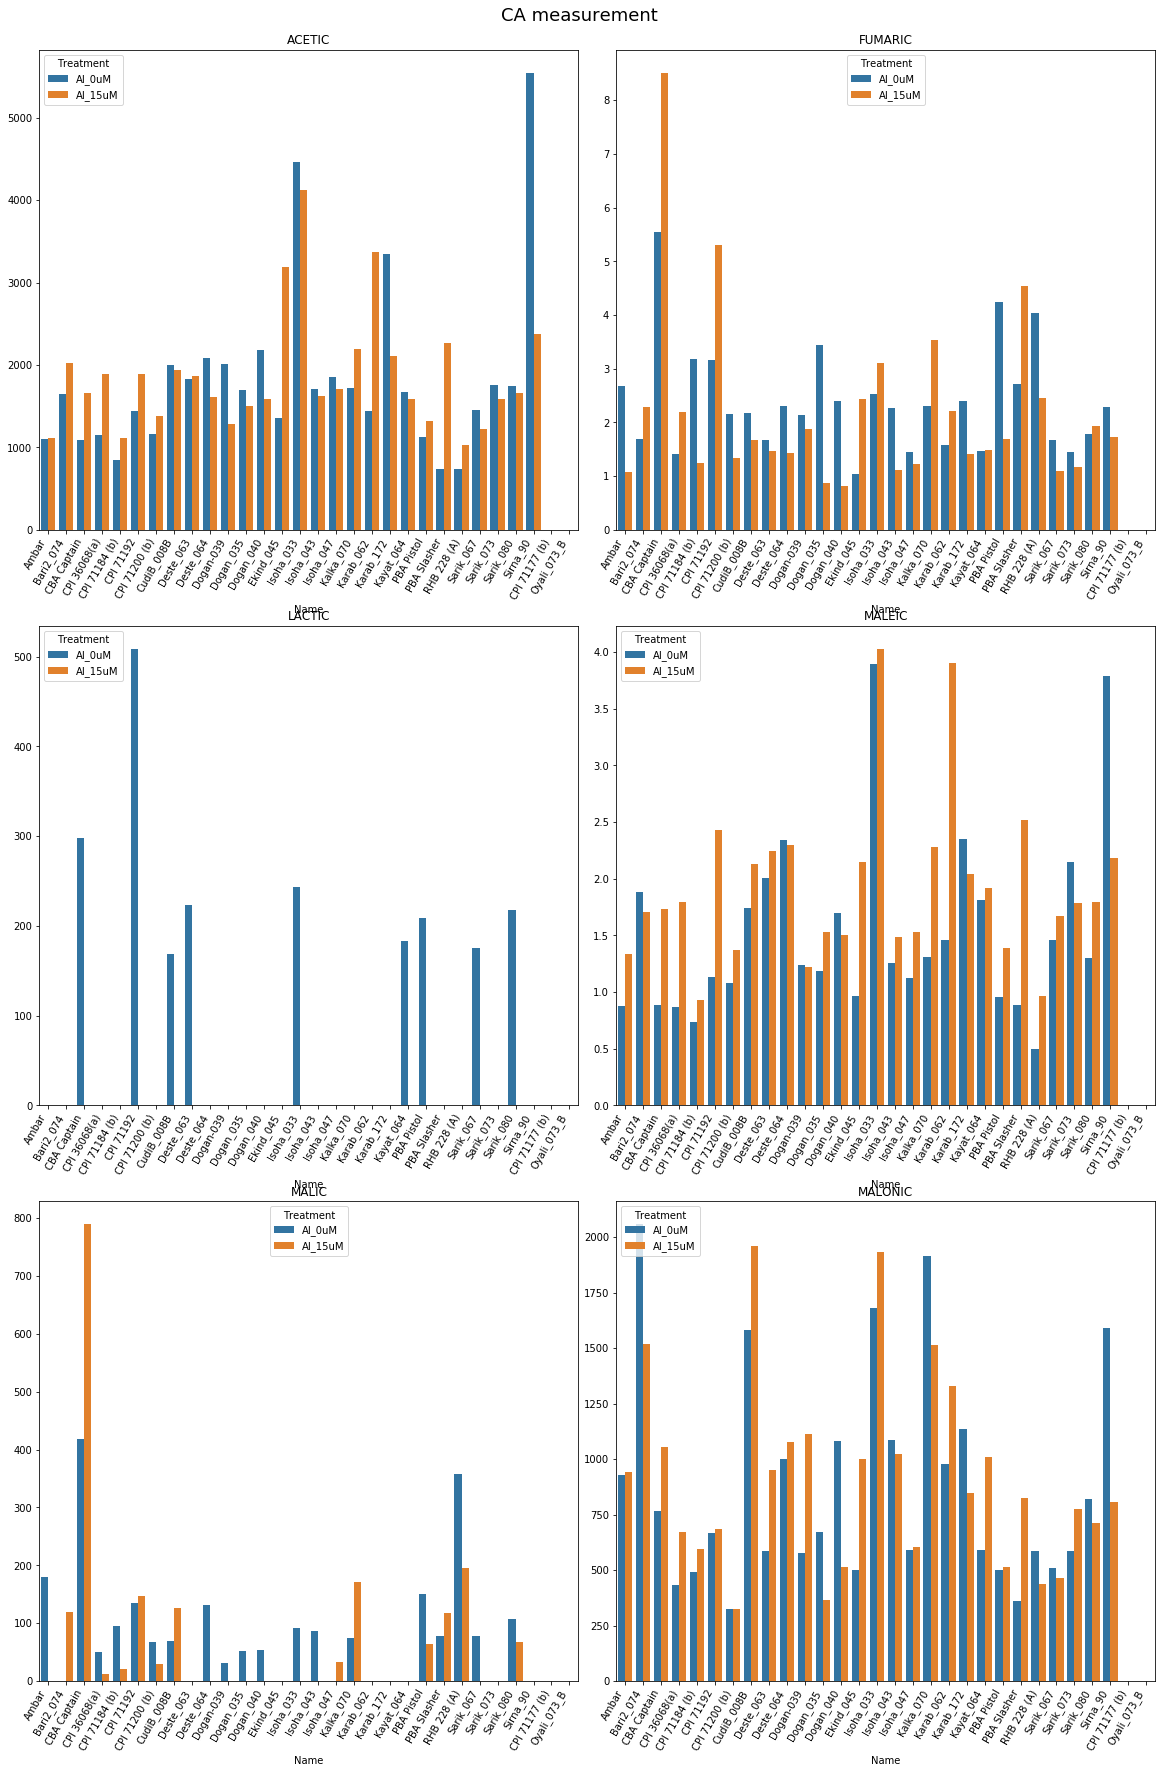

In [274]:
## create subplots using plt.subplots()
acids = ['acetic', 'fumaric','lactic', 'maleic', 'malic', 'malonic']
plt.figure(figsize=(20, 30))
plt.suptitle("CA measurement", fontsize=18,y=0.9)
for n, acid in enumerate(acids):
    # add a new subplot iteratively
    data=data21[data21.Acid==acid]
    ax = plt.subplot(3, 2, n + 1)
    ax = sns.barplot(x="Name", y="mean", hue="Treatment", data=data) # yerr=data["std"]

    # chart formatting
    ax.set_title(acid.upper())
    ax.set(ylabel=None)
    ax.set_xticklabels(ax.get_xticklabels(), 
                         rotation=60, 
                         horizontalalignment='right')
    ##add error bar
#     x_array = np.asarray([[0, 0], [1, 1]]).T ## x axis position
#     y_array = np.asarray([[0.3, 0.4], [0.01 , 0.02]]).T## up and low limit of std
    
#     ax.plot(x_array,y_array)
plt.subplots_adjust(wspace=0.07, hspace=0.2)
plt.show()

In [251]:
data_ax.head()

Treatment,Al_0uM,Al_15uM
Name,,
Ambar,926.369887,942.737954
Bari2_074,2058.364658,1520.416873
CBA Captain,767.706616,1054.359852
CPI 36068(a),433.309607,673.590415
CPI 71177 (b),NaN,0.000000


In [255]:
errors.index

Index(['Ambar', 'Bari2_074', 'CBA Captain', 'CPI 36068(a)', 'CPI 71177 (b)',
       'CPI 71184 (b)', 'CPI 71192', 'CPI 71200 (b)', 'CudiB_008B',
       'Deste_063', 'Deste_064', 'Dogan-039', 'Dogan_035', 'Dogan_040',
       'Ekind_045', 'Isoha_033', 'Isoha_043', 'Isoha_047', 'Kalka_070',
       'Karab_062', 'Karab_172', 'Kayat_064', 'Oyali_073_B', 'PBA Pistol',
       'PBA Slasher', 'RHB 228 (A)', 'Sarik_067', 'Sarik_073', 'Sarik_080',
       'Sirna_90'],
      dtype='object', name='Name')

In [257]:
data_ax.head()

Treatment,Al_0uM,Al_15uM
Name,,
Ambar,926.369887,942.737954
Bari2_074,2058.364658,1520.416873
CBA Captain,767.706616,1054.359852
CPI 36068(a),433.309607,673.590415
CPI 71177 (b),NaN,0.000000


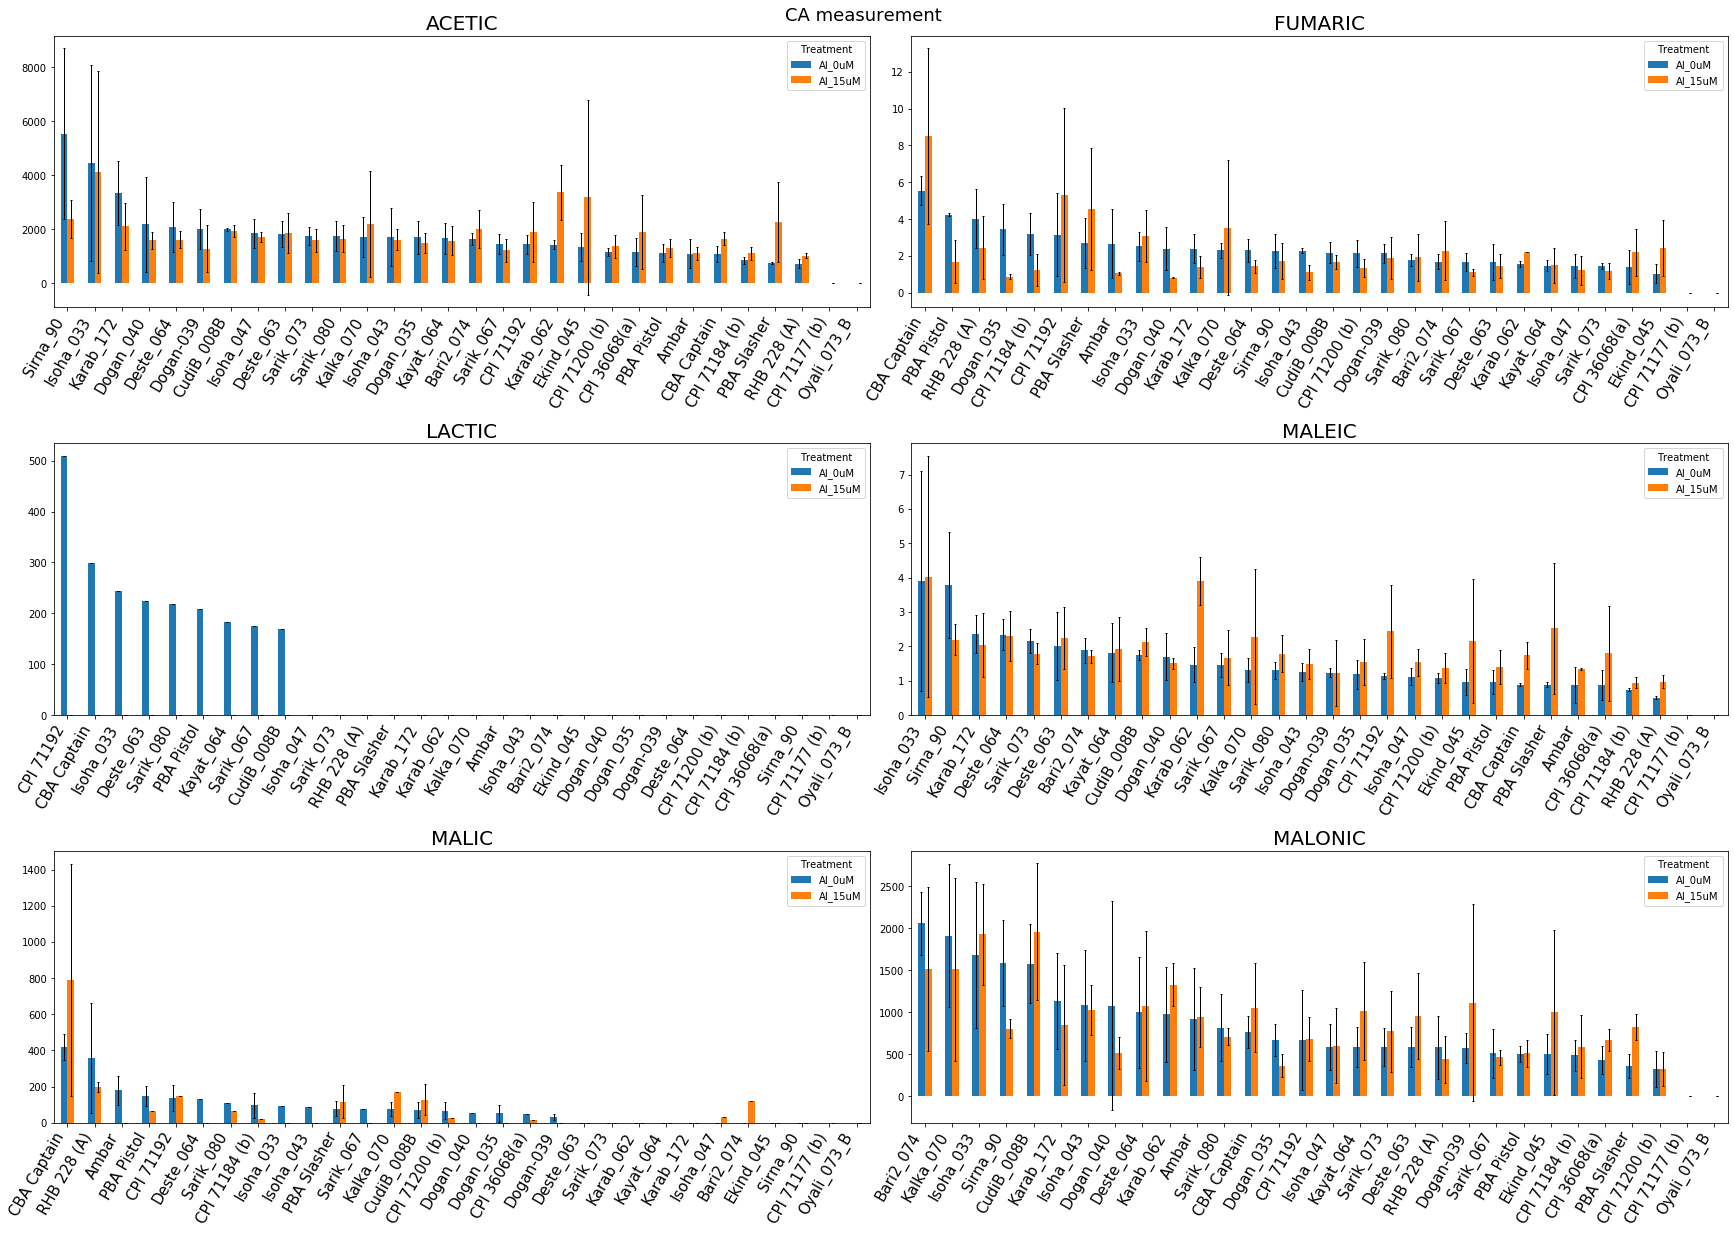

In [267]:
## create subplots using plt.subplots()
acids = ['acetic', 'fumaric','lactic', 'maleic', 'malic', 'malonic']
fig = plt.figure(figsize=(30, 20))
plt.suptitle("CA measurement", fontsize=18,y=0.9)
for n, acid in enumerate(acids):
    # add a new subplot iteratively
    data=data21[data21.Acid==acid] # get acid data
    data_ax = data.pivot("Name", "Treatment", "mean").sort_values(by=["Al_0uM"],ascending=False) # sort data by Al_0uM control
    sorter = data_ax.index.to_list()
    errors = data.pivot("Name", "Treatment", "std")
    errors = errors.reindex(sorter)

    ax = plt.subplot(3, 2, n + 1)
    data_ax.plot.bar(yerr=errors,ax=ax,error_kw=dict(lw=1, capsize=1, capthick=1))

    # chart formatting
    ax.set_title(acid.upper(),fontsize=20)
    ax.set(xlabel=None)
    ax.set_xticklabels(ax.get_xticklabels(), 
                         rotation=60,
                        fontsize=15,
                         horizontalalignment='right')
    ##another way to add error bar
#     x_array = np.asarray([[0, 0], [1, 1]]).T ## x axis position
#     y_array = np.asarray([[0.3, 0.4], [0.01 , 0.02]]).T## up and low limit of std
    
#     ax.plot(x_array,y_array)
plt.subplots_adjust(wspace=0.05, hspace=0.5)
plt.show()

In [269]:
fig.savefig("All_in_one.png",dpi=300)

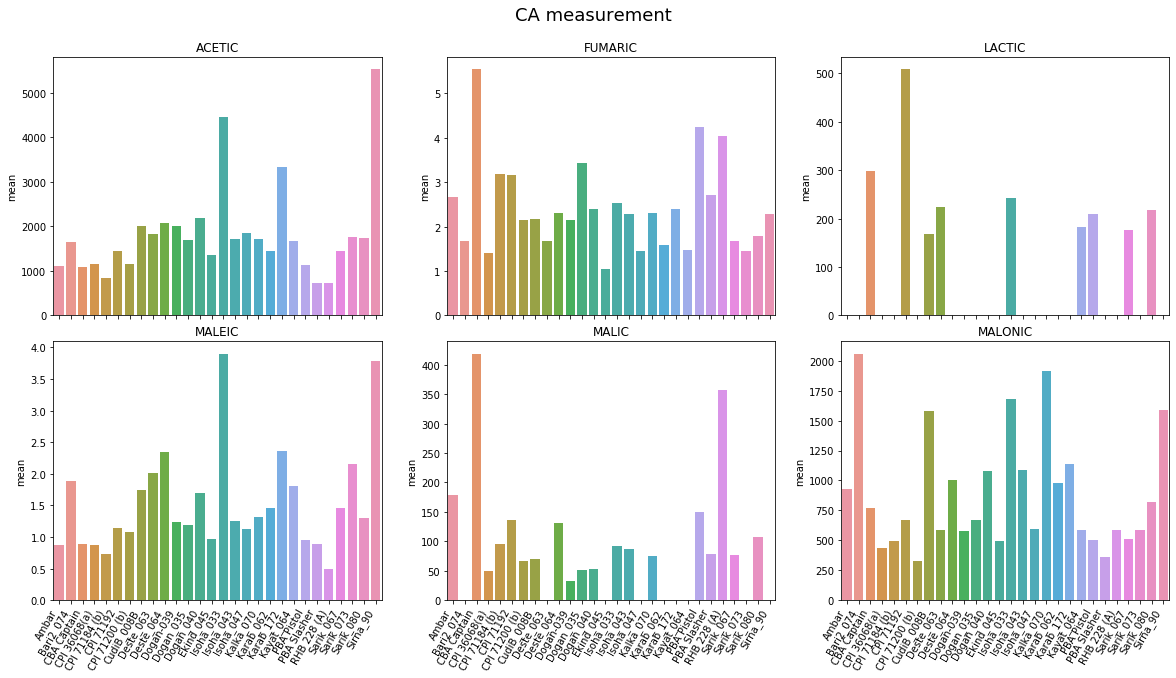

In [195]:
## looping to create subplots
acids = ['acetic', 'fumaric','lactic', 'maleic', 'malic', 'malonic']
fig,axs = plt.subplots(2,3,figsize=(20, 10),sharex=True,sharey=False)
plt.subplots_adjust(hspace=0.1)
plt.suptitle("CA measurement", fontsize=18, y=0.95)

for acid, ax in zip(acids, axs.ravel()):
    data=data1[data1.Acid==acid]
    sns.barplot(x="Name", y="mean", data=data,ax=ax) # working
    # ax = sns.barplot(x="Name", y="mean", data=data) # not working
    
    # chart formatting
    ax.set_title(acid.upper())
    ax.set(xlabel=None)
    ax.set_xticklabels(ax.get_xticklabels(), 
                         rotation=60, 
                         horizontalalignment='right')
plt.show()

In [107]:
g.savefig("test.png")

## Plotting individual acid

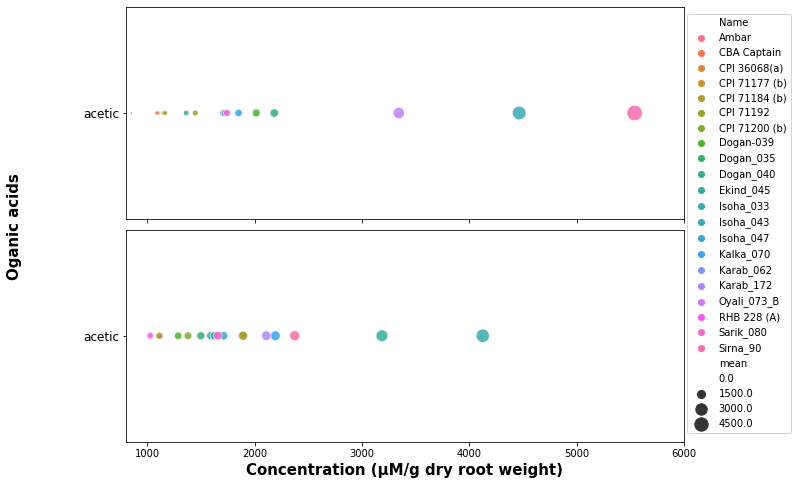

In [114]:

fig,ax=plt.subplots(2,1,figsize=(10,8),sharex=True, sharey=True)

sns.scatterplot(ax=ax[0], data=data1[data1["Acid"]=="acetic"],y="Acid", x="mean", alpha=0.85,hue="Name", size="mean",sizes=(0,240),\
               legend=False) 
sns.scatterplot(ax=ax[1], data=data2[data2["Acid"]=="acetic"],y="Acid", x="mean", alpha=0.85,hue="Name", size="mean",sizes=(0,178.66))

## sizes adjusted based max value in two dataset


ax[1].legend(bbox_to_anchor= (1.2, 2.04) ) ## move legend position

##hide x y labels
ax[0].set_ylabel('', fontsize=15)
ax[1].set_ylabel('', fontsize=15)
plt.xlabel('Concentration (μM/g dry root weight)', fontsize=15,fontweight='bold')

## zoom in x axis
ax[0].set_xlim(800,6000)

## add shared labels
#fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(-0.04, 0.5, 'Oganic acids', va='center', rotation='vertical',fontsize=15,fontweight='bold') ##

plt.setp(ax[0].get_yticklabels(), fontsize=12)
plt.setp(ax[1].get_yticklabels(), fontsize=12)

#plt.grid(True)
#plt.tight_layout() ## prevent label cutoff
plt.subplots_adjust(wspace=0, hspace=0.05) ## tight space between subplots

plt.show()

In [115]:
fig.savefig("CA2_normalized_acetic.png",dpi=600,bbox_inches = 'tight')

In [86]:
### save processed mean
df_con0_nom.reset_index().to_csv("CA2_Control_concentration_mean.csv")
df_con15_nom.reset_index().to_csv("CA2_Al_concentration_mean.csv")

In [97]:
### merged and compare control and treatment
df_con0_con15 = df_con0_nom.reset_index().merge(df_con15_nom.reset_index(),on=["Name","Acid"],how="outer")

In [98]:
df_con0_con15.to_csv("CA2_Control_Al_normalized_concentration_mean.csv")

In [95]:
df_con0_con15 = df_con0.reset_index().merge(df_con15.reset_index(),on=["Name","Acid"],how="outer")

In [96]:
df_con0_con15.to_csv("CA2_Control_Al_raw_concentration_mean.csv")

### plotting acids with data only
### remove fillna(0)

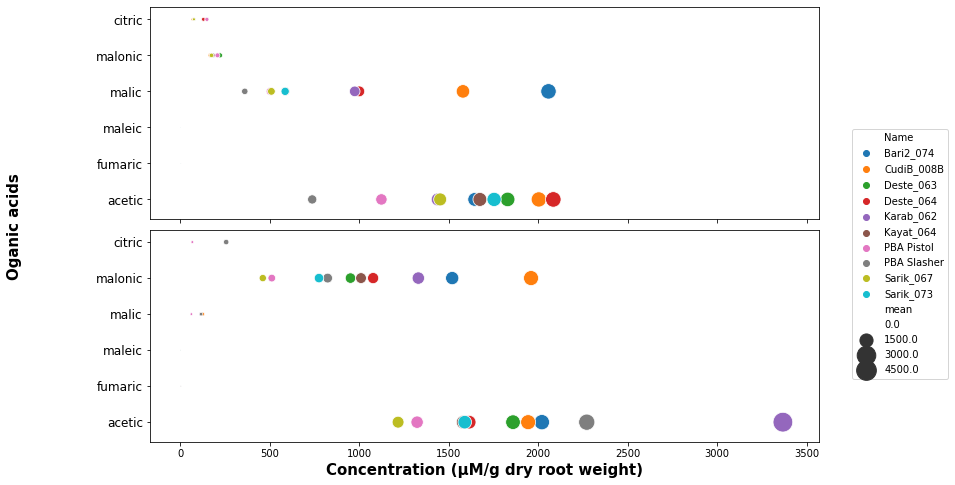

In [52]:
## reset_index to convert index back to columns

## fillna(0) to show all acids, default removing Nan lines

##swap x,y to change orientation

## testing scatterplot and swarmplot (not supporting sizes)

fig,ax=plt.subplots(2,1,figsize=(12,8),sharex=True, sharey=True)

sns.scatterplot(ax=ax[0], data=df_con0_nom.reset_index(),y="Acid", x="mean", hue="Name", size="mean",sizes=(0,240),\
               legend=False) 

sns.scatterplot(ax=ax[1], data=df_con15_nom.reset_index(),y="Acid", x="mean", hue="Name", size="mean",sizes=(0,388))
## sizes adjusted based max value in two dataset


ax[1].legend(bbox_to_anchor= (1.2, 1.5) ) ## move legend position

##hide x y labels
ax[0].set_ylabel('', fontsize=15)
ax[1].set_ylabel('', fontsize=15)
plt.xlabel('Concentration (μM/g dry root weight)', fontsize=15,fontweight='bold')

## add shared labels
#fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(-0.04, 0.5, 'Oganic acids', va='center', rotation='vertical',fontsize=15,fontweight='bold') ##

plt.setp(ax[0].get_yticklabels(), fontsize=12)
plt.setp(ax[1].get_yticklabels(), fontsize=12)

#plt.grid(True)
#plt.tight_layout() ## prevent label cutoff
plt.subplots_adjust(wspace=0, hspace=0.05) ## tight space between subplots

plt.show()

## check any correlation between LLR, stem weight, root weight, and CA

In [179]:
df_control.head()

,SampleName,Name,AGG Accession,Treatment,Replicate,Acid,Concentration,st dry wt,rt dry wt,LLR 1,LLR 2,Concentration_wt
0,1-1,CudiB_008B,49871,0 Al,R1,malic,3.12260,0.14,0.082,173,118.0,38.080488
1,1-1,CudiB_008B,49871,0 Al,R1,malonic,88.72245,0.14,0.082,173,118.0,1081.981098
2,1-1,CudiB_008B,49871,0 Al,R1,iso-citric,NaN,0.14,0.082,173,118.0,NaN
3,1-1,CudiB_008B,49871,0 Al,R1,shikimic,NaN,0.14,0.082,173,118.0,NaN
4,1-1,CudiB_008B,49871,0 Al,R1,lactic,13.87087,0.14,0.082,173,118.0,169.156951


In [180]:
## groupby to get mean
df_mean0 = df_control.groupby(["Name","Acid"]).mean()
df_mean15 = df_treatment.groupby(["Name","Acid"]).mean()

In [182]:
## change column names
col_names = ["Concentration_raw","Stem_dry","Root_dry","LLR1","LLR2","Concentration_wt"]
df_mean0.columns = col_names
df_mean15.columns = col_names

In [190]:
## reset index to filter single acid for pairplot
df_mean0.reset_index(inplace=True)
df_mean15.reset_index(inplace=True)

In [203]:
df_mean15.head()

,Name,Acid,Concentration_raw,Stem_dry,Root_dry,LLR1,LLR2,Concentration_wt,LLR
0,Bari2_074,acetic,139.092563,0.113333,0.07,65.333333,69.0,2021.445696,67.166667
1,Bari2_074,cis-aconitic,NaN,0.113333,0.07,65.333333,69.0,NaN,67.166667
2,Bari2_074,citramalic,NaN,0.113333,0.07,65.333333,69.0,NaN,67.166667
3,Bari2_074,citric,NaN,0.113333,0.07,65.333333,69.0,NaN,67.166667
4,Bari2_074,fumaric,0.156747,0.113333,0.07,65.333333,69.0,2.289456,67.166667


In [202]:
## Calculated mean LLR
df_mean0["LLR"] = (df_mean0["LLR1"] + df_mean0["LLR2"])/2
df_mean15["LLR"] = (df_mean15["LLR1"] + df_mean15["LLR2"])/2

In [208]:
target_cols=["Concentration_raw","Stem_dry","Root_dry","LLR","Concentration_wt"]

In [237]:
df_mean0_malonic = df_mean0[df_mean0["Acid"]=="malonic"][target_cols]
df_mean15_malonic = df_mean15[df_mean15["Acid"]=="malonic"][target_cols]

df_mean0_acetic = df_mean0[df_mean0["Acid"]=="acetic"][target_cols]
df_mean15_acetic = df_mean15[df_mean15["Acid"]=="acetic"][target_cols]

In [210]:
df_mean0_malonic.shape

(10, 5)

In [222]:
## annotate linear regression info to graph
from scipy.stats import pearsonr
def corrfunc2(x, y, **kws):
    nas = np.logical_or(x.isna(), y.isna())
    (r, p) = pearsonr(x[~nas], y[~nas])
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate(",  p = {:.2f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

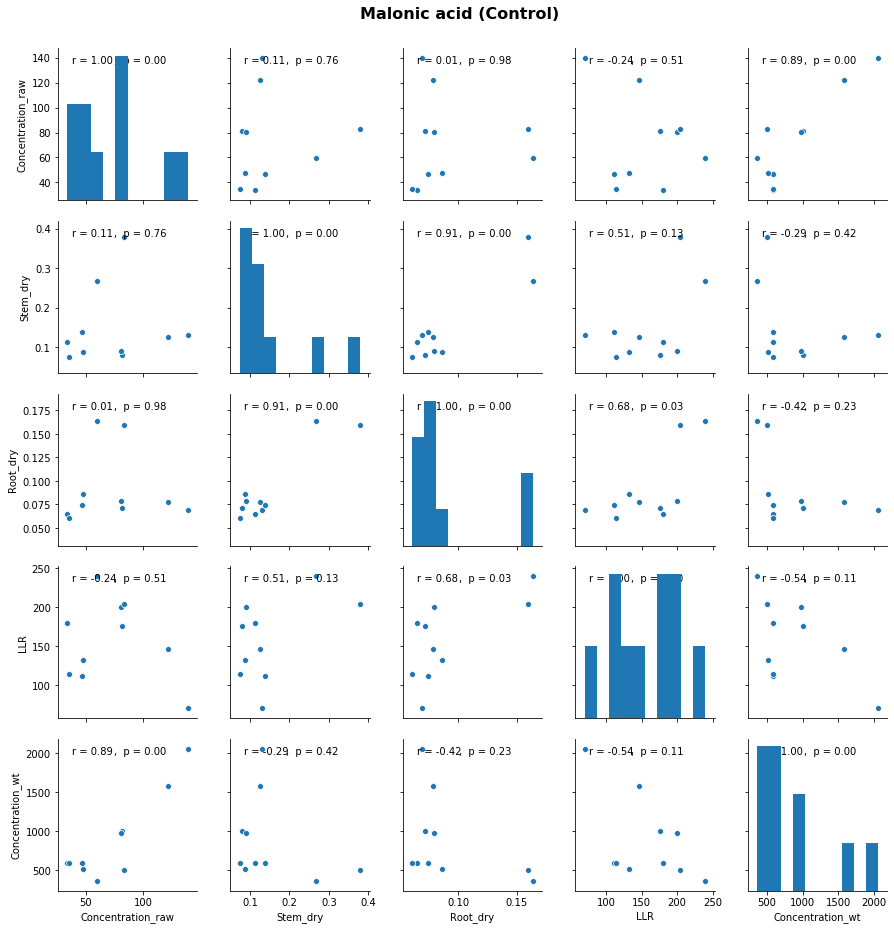

In [234]:
graph1 = sns.pairplot(df_mean0_malonic)
graph1.map(corrfunc2)
graph1.fig.suptitle("Malonic acid (Control)", y=1.03,fontsize=16,fontweight="bold")
plt.show()

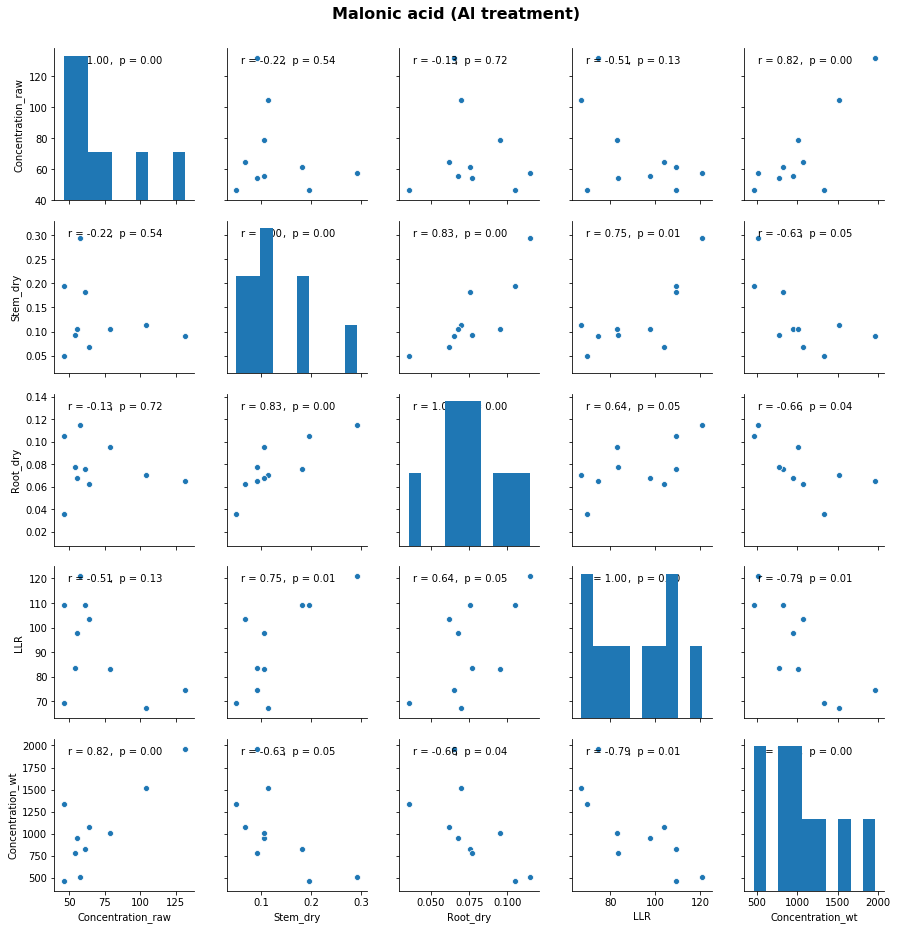

In [235]:
graph2 = sns.pairplot(df_mean15_malonic)
graph2.map(corrfunc2)
graph2.fig.suptitle("Malonic acid (Al treatment)", y=1.03,fontsize=16,fontweight="bold")
plt.show()

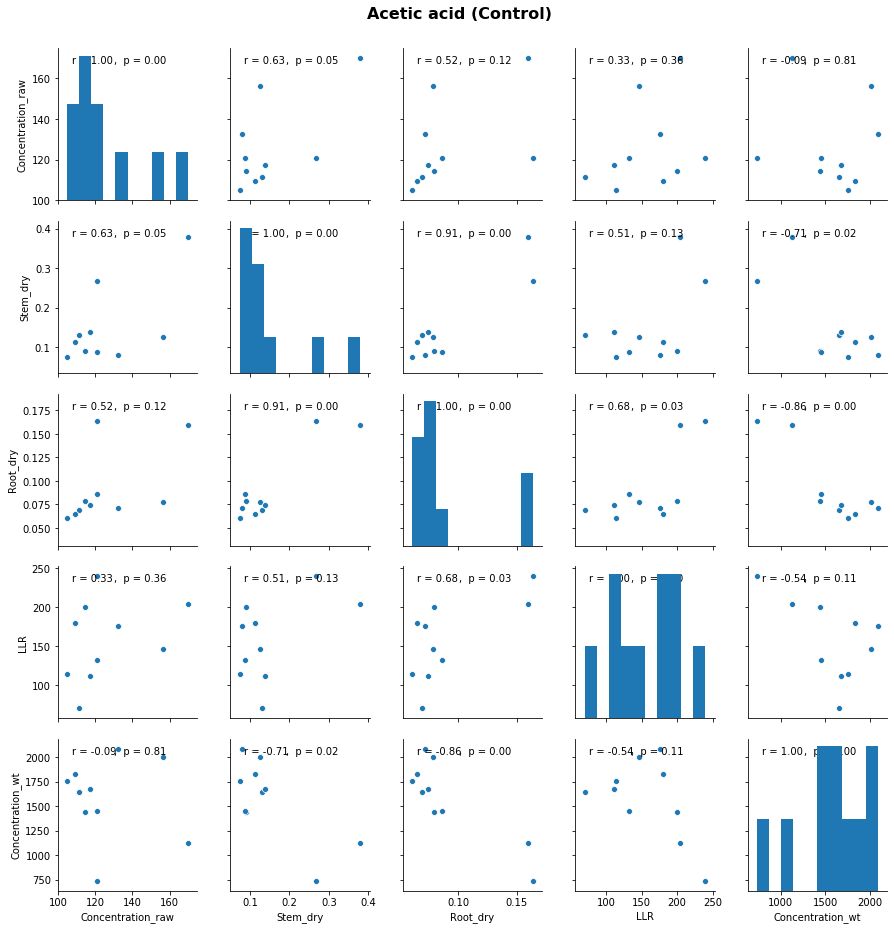

In [238]:
graph3 = sns.pairplot(df_mean0_acetic)
graph3.map(corrfunc2)
graph3.fig.suptitle("Acetic acid (Control)", y=1.03,fontsize=16,fontweight="bold")
plt.show()

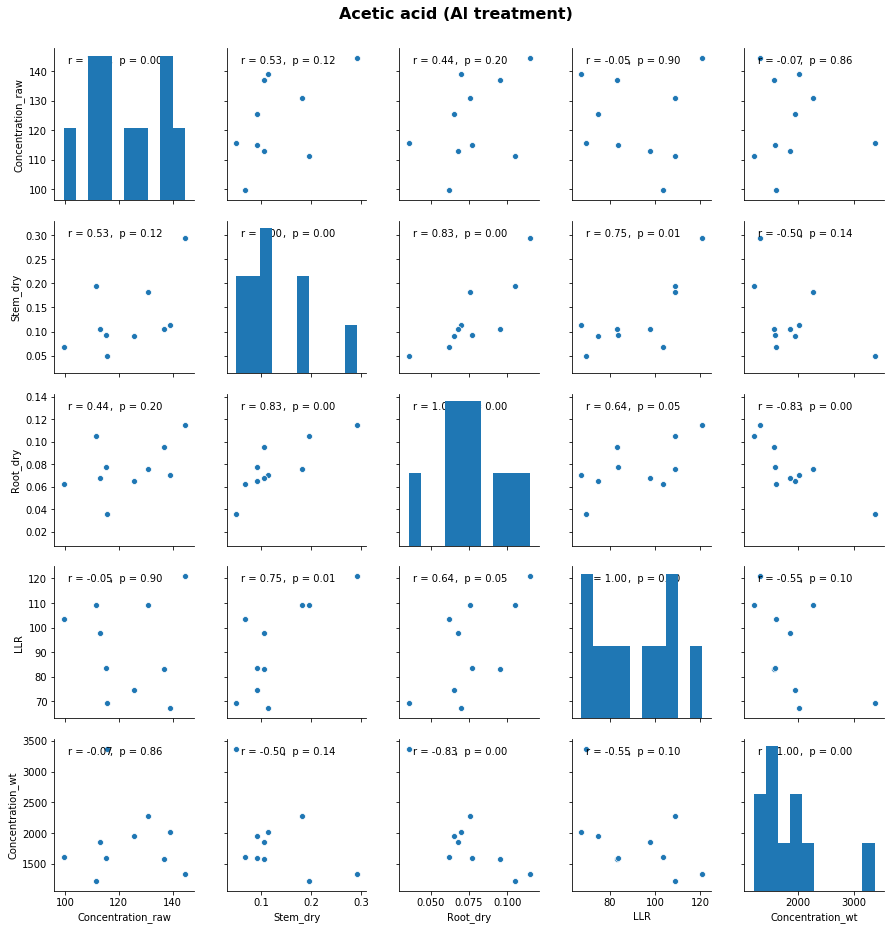

In [239]:
graph4 = sns.pairplot(df_mean15_acetic)
graph4.map(corrfunc2)
graph4.fig.suptitle("Acetic acid (Al treatment)", y=1.03,fontsize=16,fontweight="bold")
plt.show()

In [233]:
graph.savefig("Malonic_pairplot_15Al.png",dpi=300)

In [73]:
df_short[["Container","Sample_order"]] = df_short["SampleName"].str.split("-",expand=True)

In [75]:
df_short["Container"] = df_short["Container"].str.replace("Yong ","")

In [ ]:
controls = []
df_control = df_short[df_short["Container"].isin()]

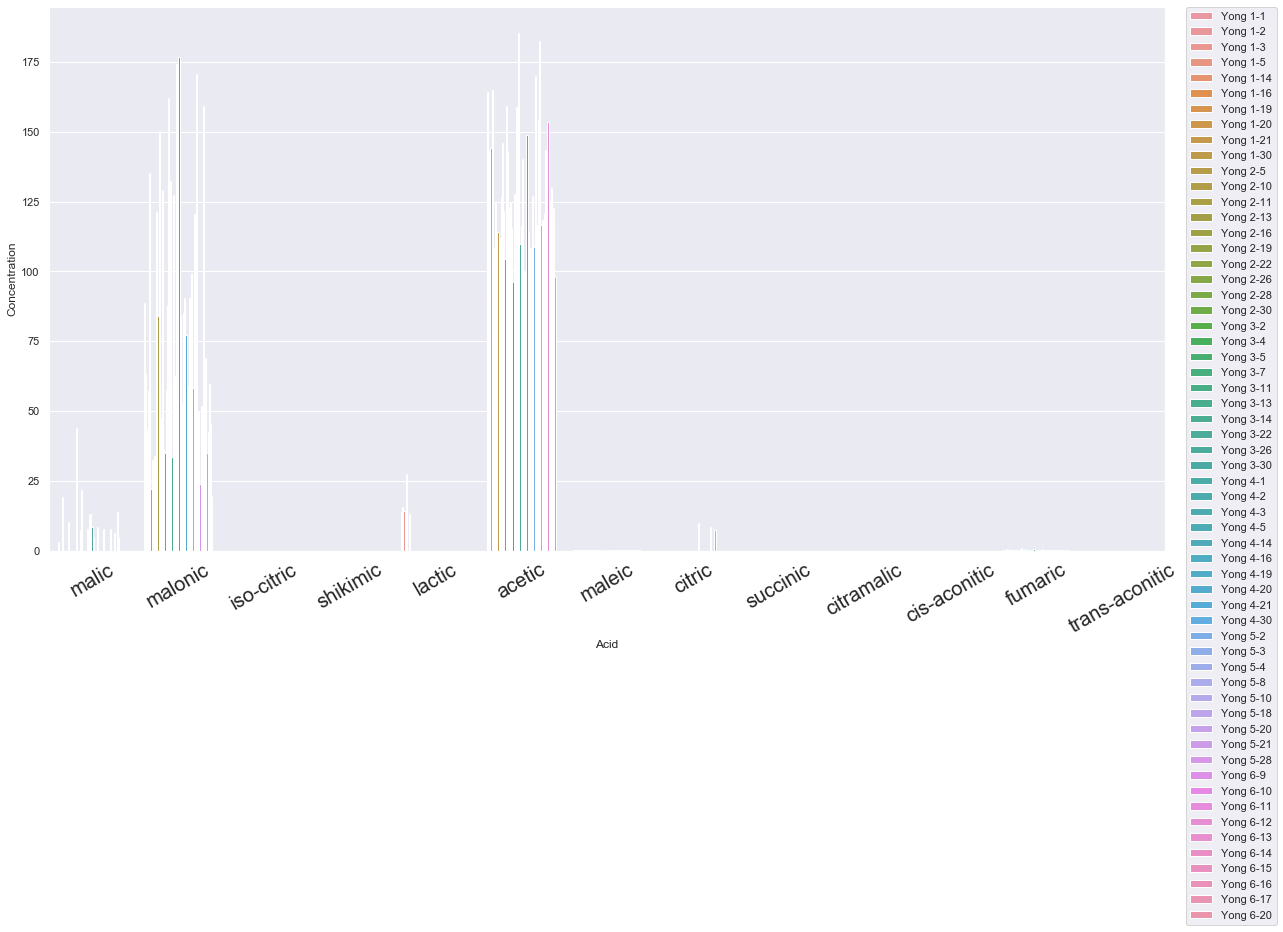

In [72]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="Acid", y="Concentration", hue="SampleName",data=df_short, ci=None)
plt.legend(bbox_to_anchor=(1.1, 1),
           borderaxespad=0) ## move legend outside figure
ax.tick_params(axis='x', rotation=30,labelsize=20)

## grouped barplot in pyplot, example

  Team  Round 1  Round 2  Round 3  Round 4
0    A       10       20       10       30
1    B       20       25       15       25
2    C       12       15       19        6
3    D       10       29       13       19


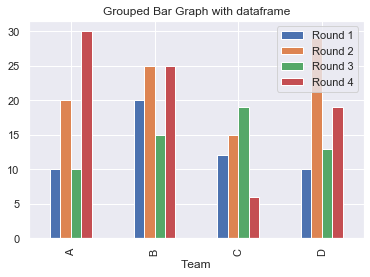

In [62]:
# create data
df = pd.DataFrame([['A', 10, 20, 10, 30], ['B', 20, 25, 15, 25], ['C', 12, 15, 19, 6],
                   ['D', 10, 29, 13, 19]],
                  columns=['Team', 'Round 1', 'Round 2', 'Round 3', 'Round 4'])
# view data
print(df)
  
# plot grouped bar chart
df.plot(x='Team',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe')

In [63]:
df.head()

,Team,Round 1,Round 2,Round 3,Round 4
0,A,10,20,10,30
1,B,20,25,15,25
2,C,12,15,19,6
3,D,10,29,13,19


## import line information

In [77]:
data2 = "dry_weight_copy.xlsx"

In [78]:
df_info = pd.read_excel(data2,sheet_name="randomisation")

In [79]:
df_info.head()

,No,Container,Replicate,Treatment,Exp 18 ID,Accession,st dry wt,rt dry wt,LLR 1,LLR 2
0,1,1,R1,0 Al,2,49871,0.140,0.082,173.0,118.0
1,2,1,R1,0 Al,4,49969,0.165,0.085,133.0,115.0
2,3,1,R1,0 Al,6,50033,0.088,0.080,128.0,110.0
3,4,1,R1,0 Al,8,50043,0.045,0.047,111.0,109.0
4,5,1,R1,0 Al,10,50111,0.056,0.049,128.0,168.0


In [80]:
df_info2 = pd.read_excel(data2,sheet_name="accession_info")

In [81]:
df_info2.head()

,Exp-18 ID,AGG number,Name,Classification/tolerance,Type,Species,Classification based on*,Included in Exp-16
0,1,49809,Bari2_074,T,wild,C.retic,Exp-5,Y
1,2,49871,CudiB_008B,mod S in Exp-5/mod T in Exp-8,wild,C.retic,Exp-5 and Exp-8,Y
2,3,49959,Kalka_070,T,wild,C.retic,Exp-5,N
3,4,49969,Kayat_064,T,wild,C.retic,Exp-6,Y
4,5,50005,Oyali_073_B,S,wild,C.retic,Exp-8,N


In [82]:
df_short.head()

,SampleName,Vial,Acid,Concentration,Container,Sample_order
0,Yong 1-1,5,malic,3.12260,1,1
1,Yong 1-1,5,malonic,88.72245,1,1
2,Yong 1-1,5,iso-citric,NaN,1,1
3,Yong 1-1,5,shikimic,NaN,1,1
4,Yong 1-1,5,lactic,13.87087,1,1
